# 연속데이터 예측 아이오와에임스 지역 집값예측하기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import koreanize_matplotlib

In [2]:
data = pd.read_csv("./data/house_train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [10]:
(data.isna().sum() / len(data) * 100).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
FireplaceQu      47.260274
LotFrontage      17.739726
GarageQual        5.547945
GarageFinish      5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageCond        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtCond          2.534247
BsmtQual          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
Electrical        0.068493
Condition2        0.000000
BldgType          0.000000
Neighborhood      0.000000
LandSlope         0.000000
LotConfig         0.000000
Condition1        0.000000
LandContour       0.000000
LotShape          0.000000
Street            0.000000
LotArea           0.000000
MSSubClass        0.000000
MSZoning          0.000000
Id                0.000000
Utilities         0.000000
HouseStyle        0.000000
Foundation        0.000000
ExterQual         0.000000
ExterCond         0.000000
B

In [12]:
data = data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], axis=1)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [15]:
((data.isna().sum() / len(data) * 100).sort_values(ascending=False) > 0).index

Index(['LotFrontage', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'GarageType',
       'GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond',
       'BsmtFinType1', 'MasVnrArea', 'Electrical', 'LandSlope', 'LotConfig',
       'LotShape', 'Street', 'LotArea', 'MSZoning', 'Id', 'MSSubClass',
       'Utilities', 'LandContour', 'YearBuilt', 'YearRemodAdd', 'Condition2',
       'Neighborhood', 'ExterCond', 'ExterQual', 'Exterior2nd', 'Exterior1st',
       'RoofStyle', 'RoofMatl', 'BsmtFinSF1', 'Foundation', 'BsmtFinSF2',
       'BsmtUnfSF', 'Heating', 'Condition1', 'HouseStyle', 'OverallQual',
       'OverallCond', 'BldgType', '2ndFlrSF', '1stFlrSF', 'CentralAir',
       'HeatingQC', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'LowQualFinSF',
       'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath', 'KitchenQual', 'Fireplaces',
       'Functional', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars',
       'TotRmsAbvGrd', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

In [17]:
na_cols = ['LotFrontage', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'GarageType',
       'GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond',
       'BsmtFinType1', 'MasVnrArea', 'Electrical']

In [22]:
for col in na_cols:
#    print(data[col].dtype)
    if data[col].dtype == 'float64':
        data[col] = data[col].fillna(data[col].median())
    else:
        data[col] = data[col].fillna(data[col].mode()[0])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [24]:
X = data.drop(["SalePrice", "Id"], axis=1)
y = data['SalePrice']

In [25]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal


In [26]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [27]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

In [28]:
cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [29]:
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

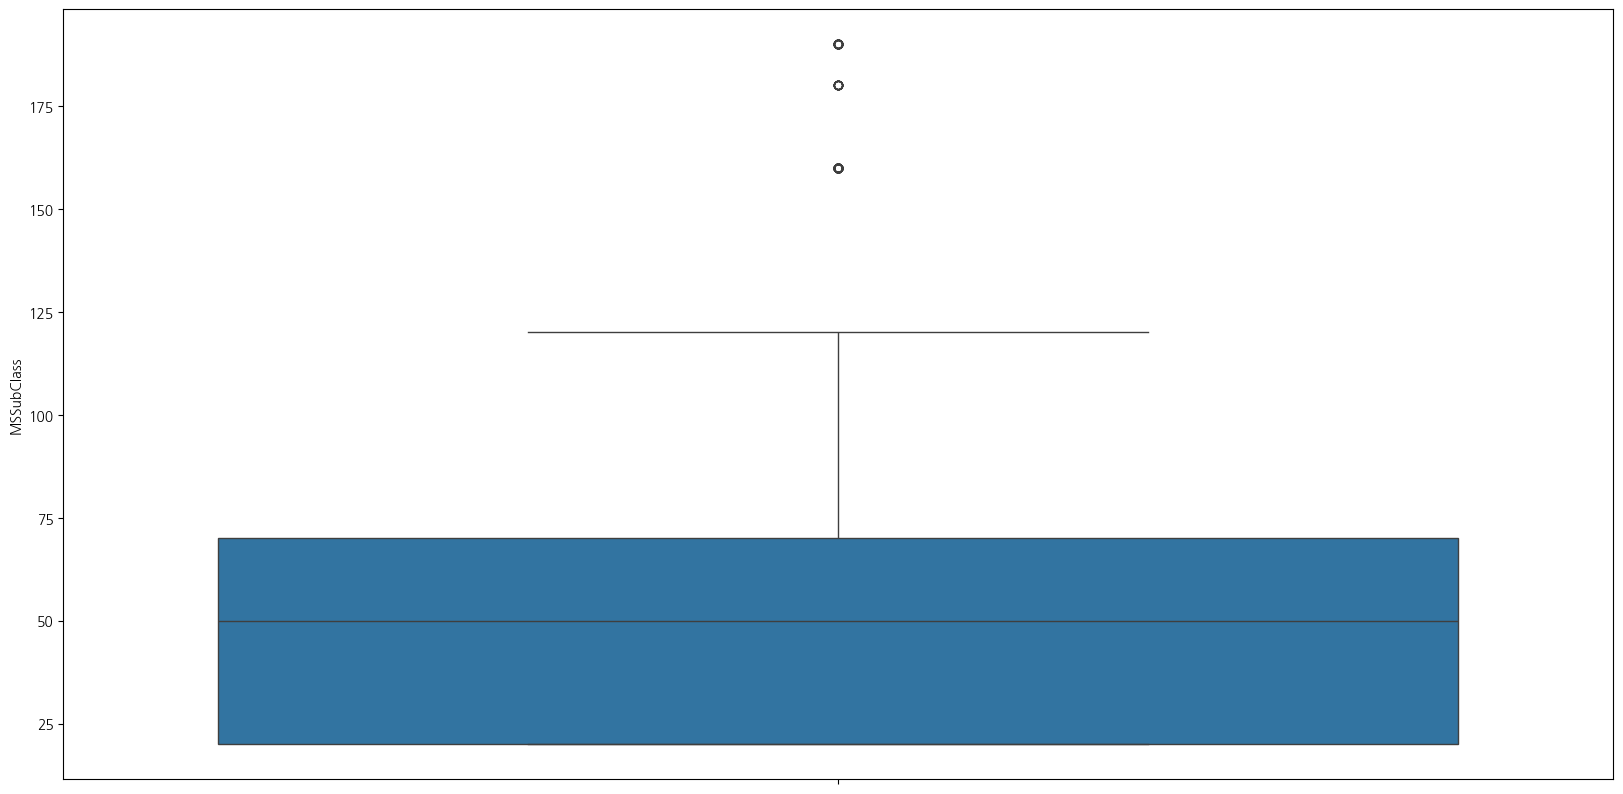

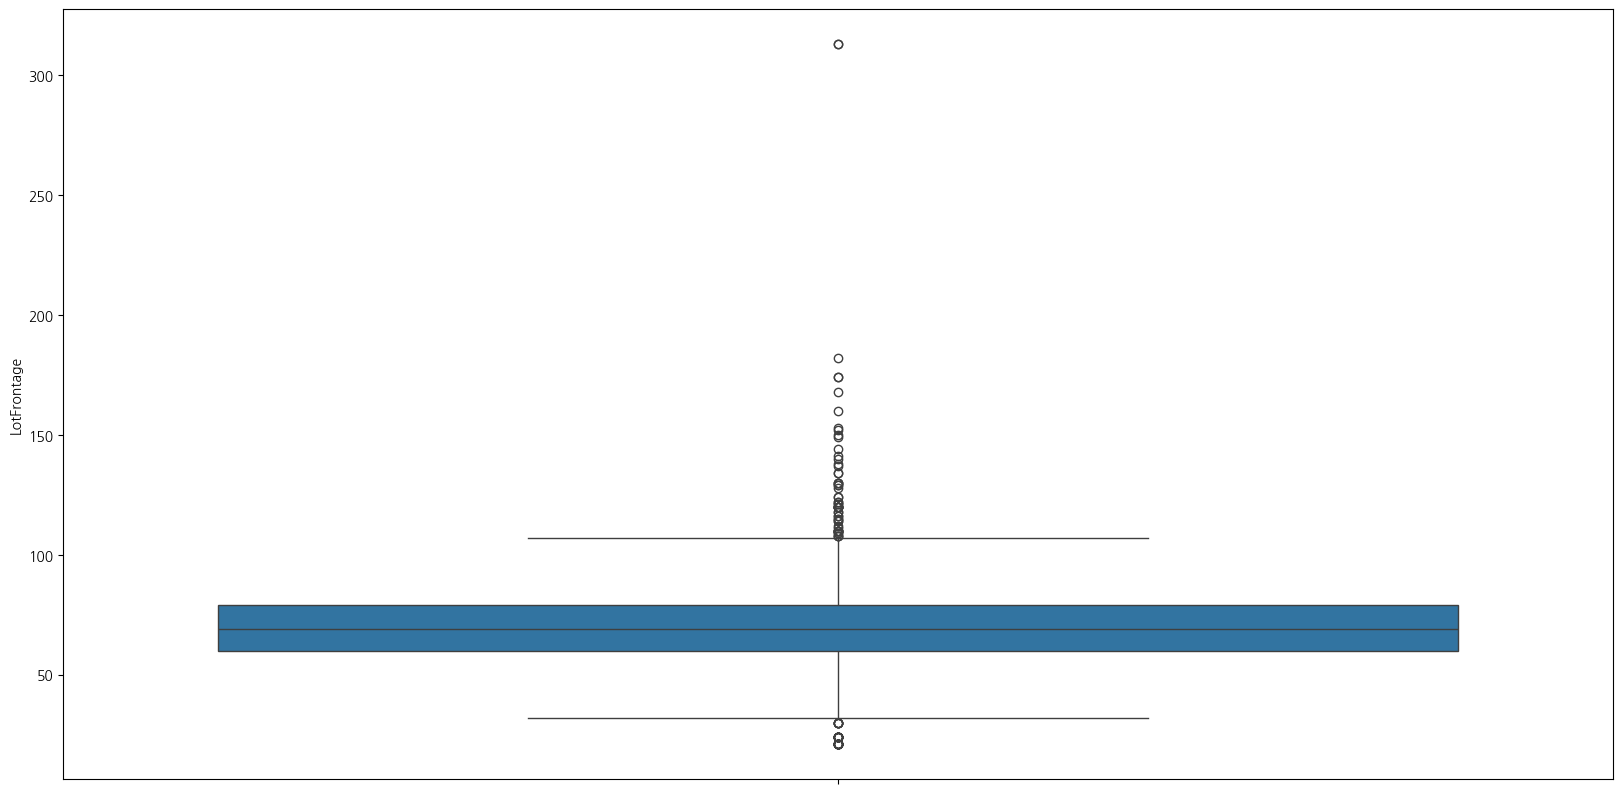

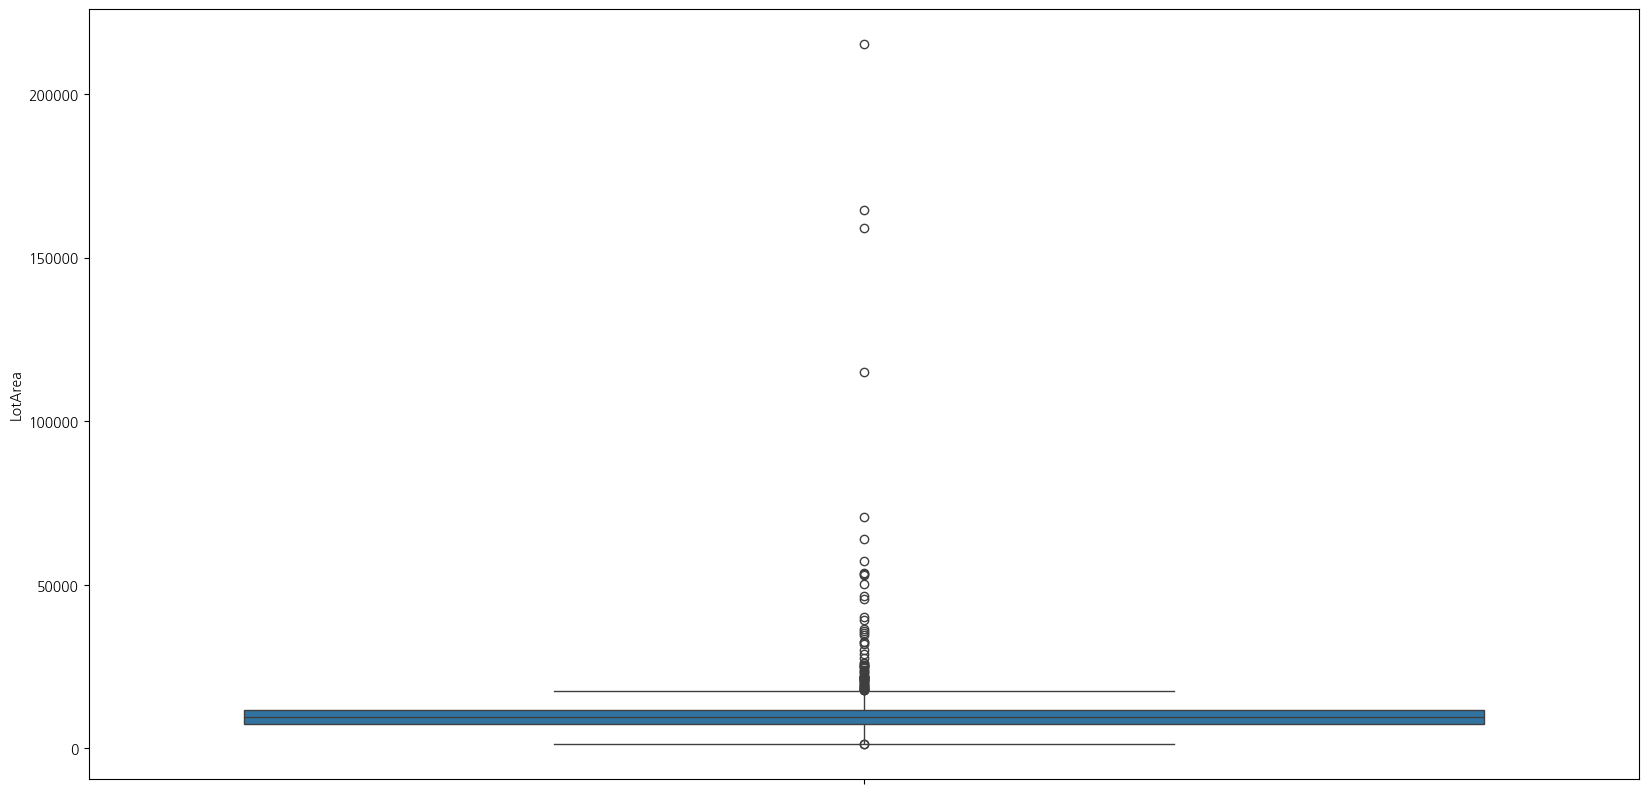

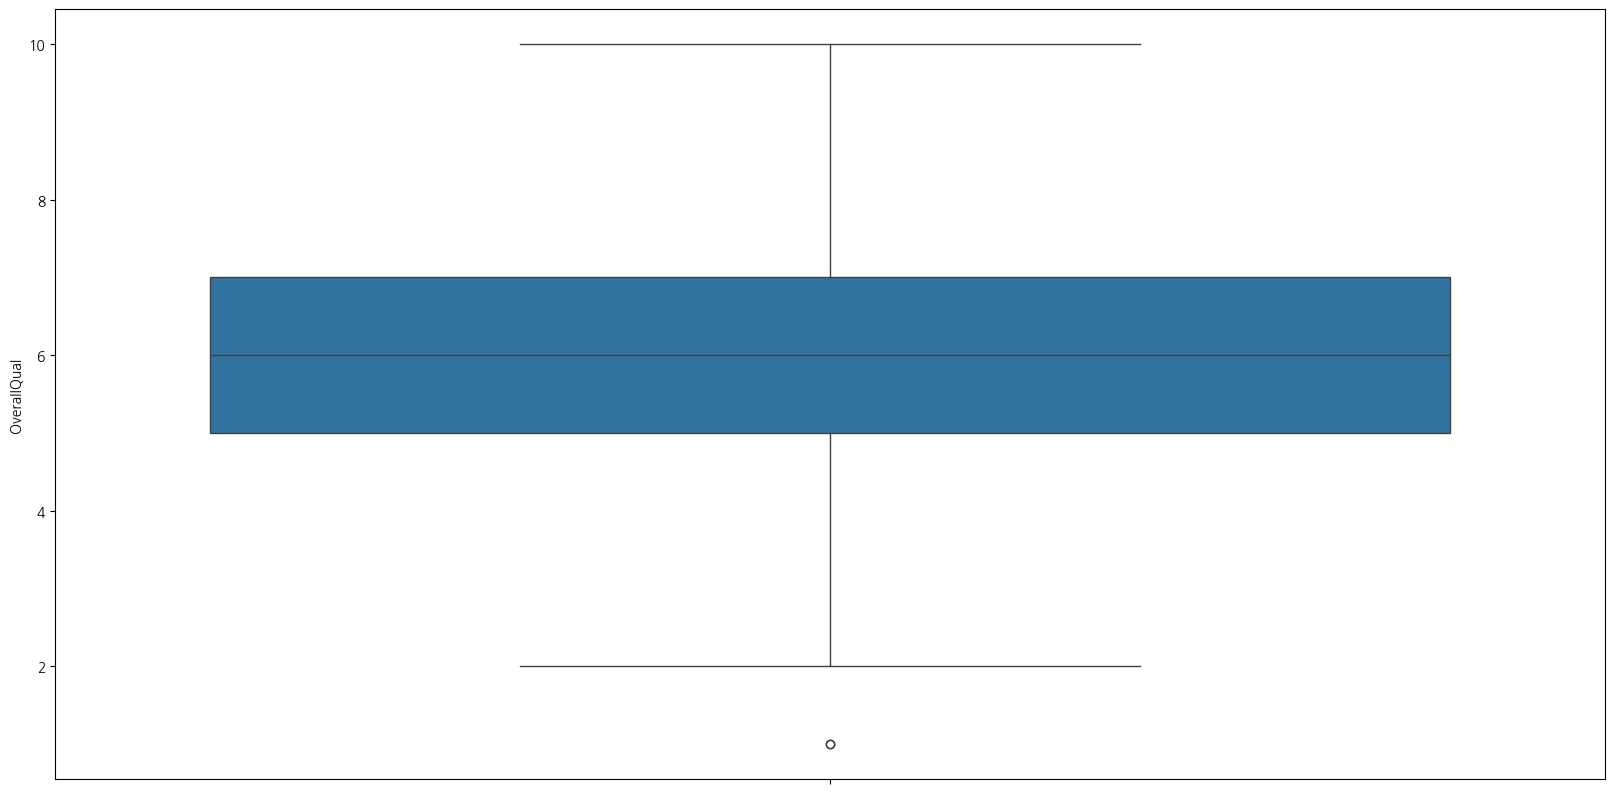

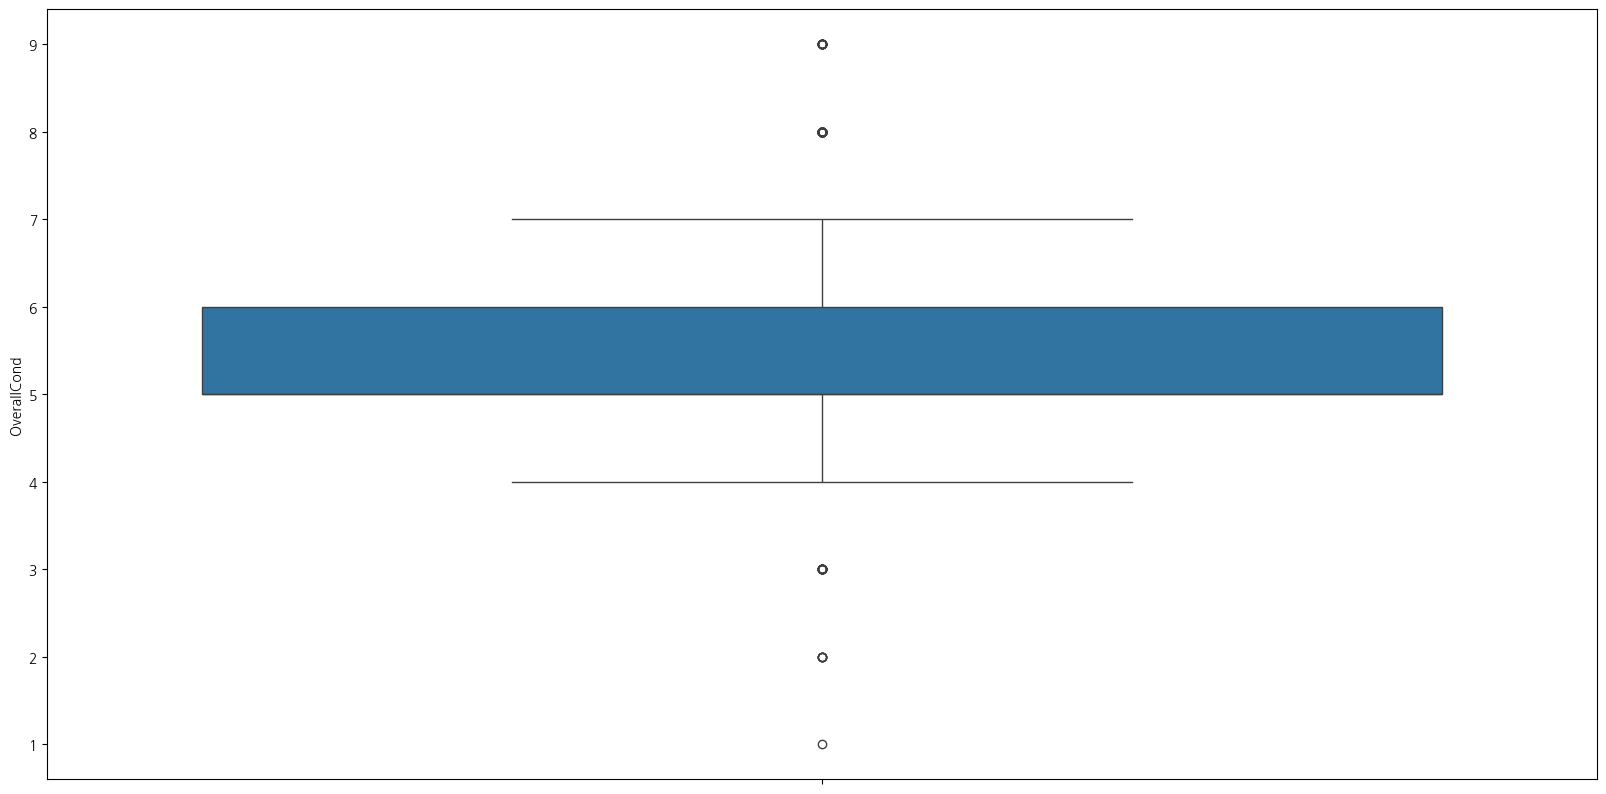

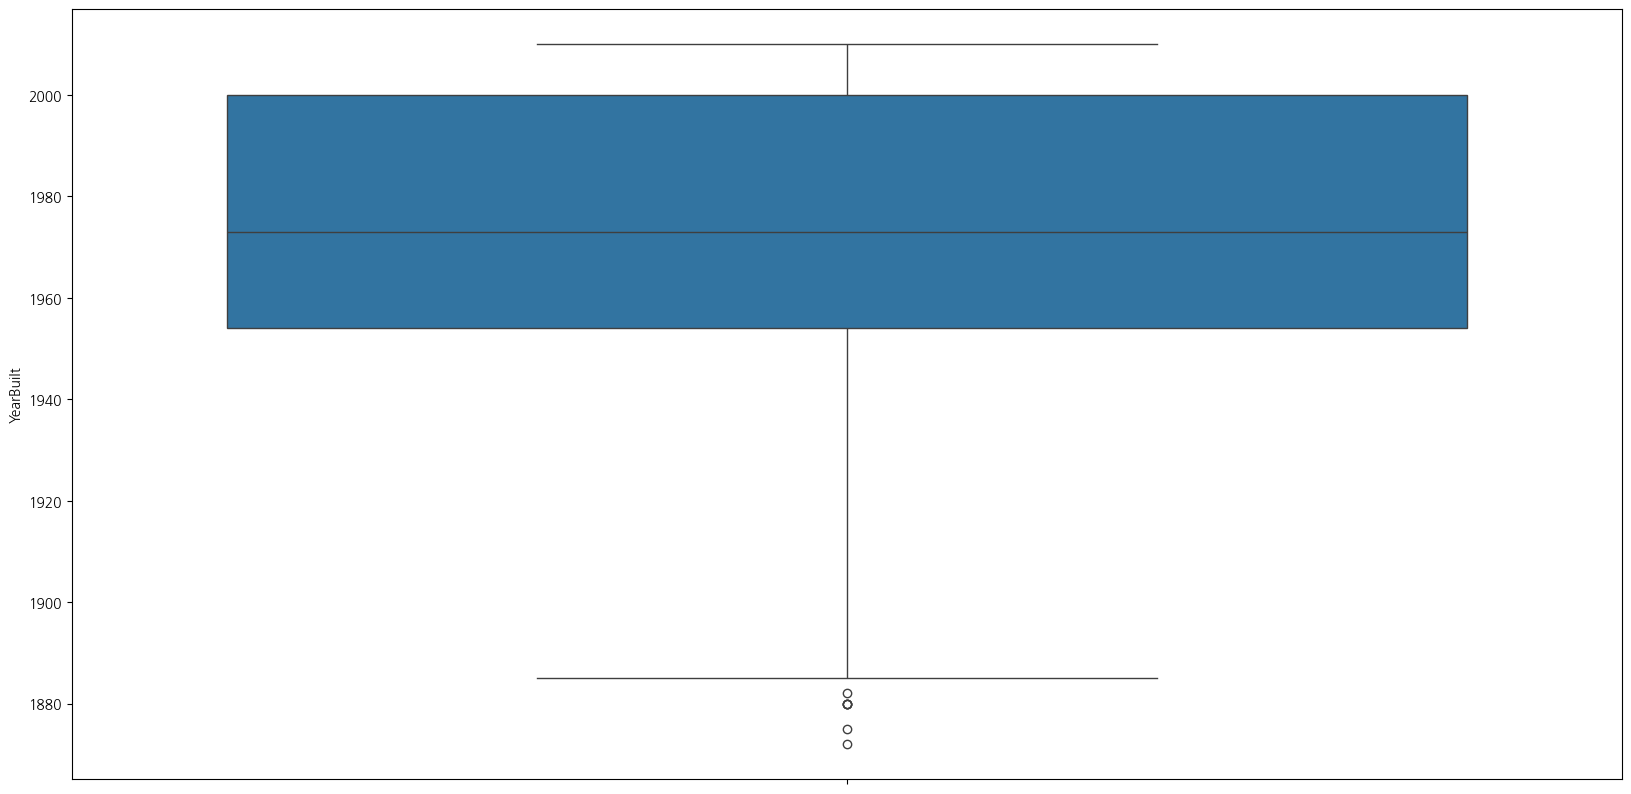

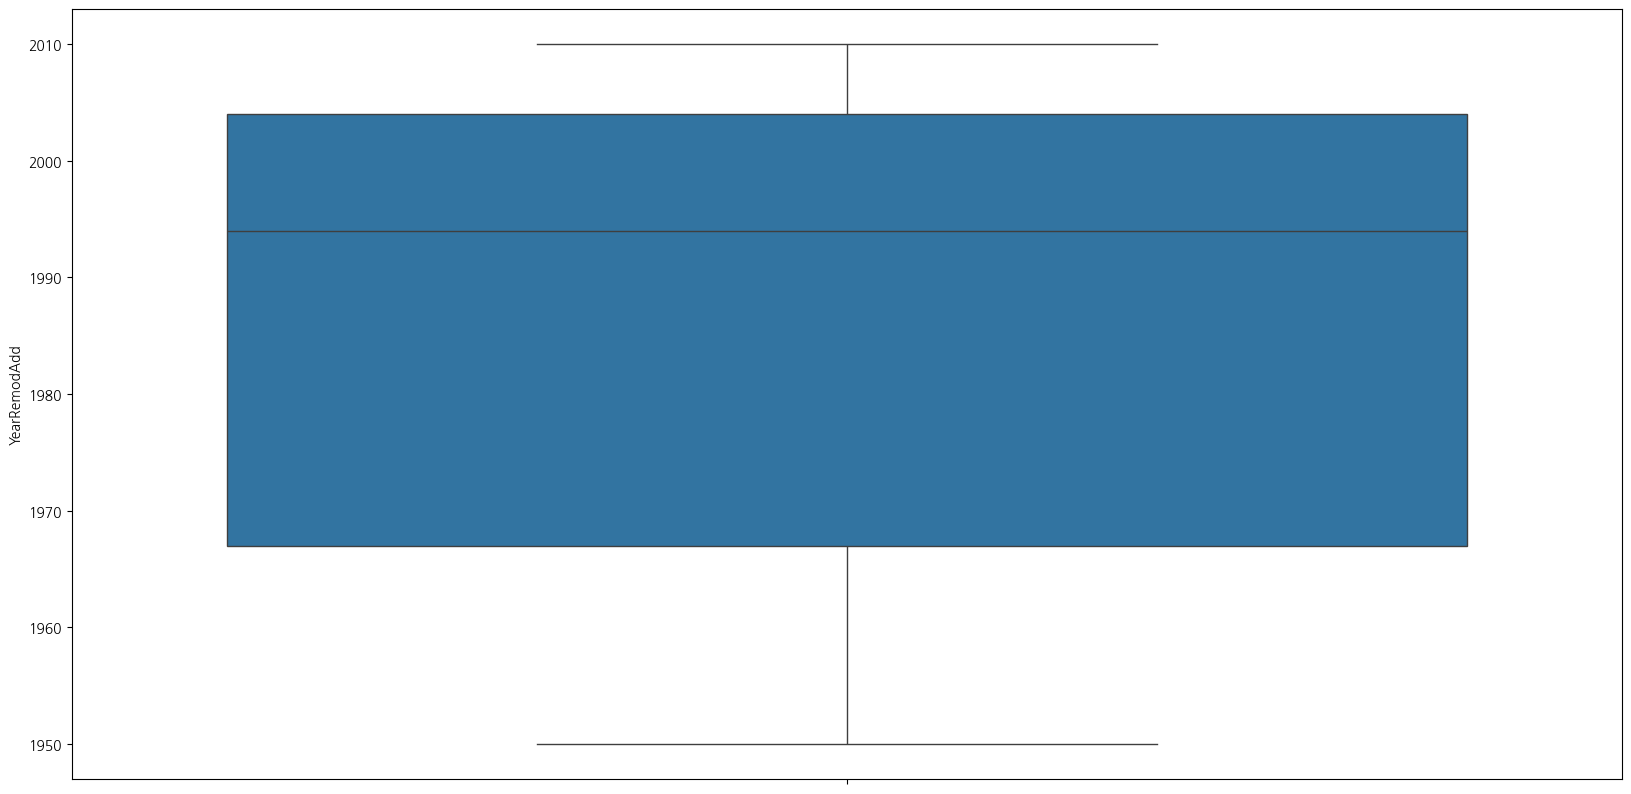

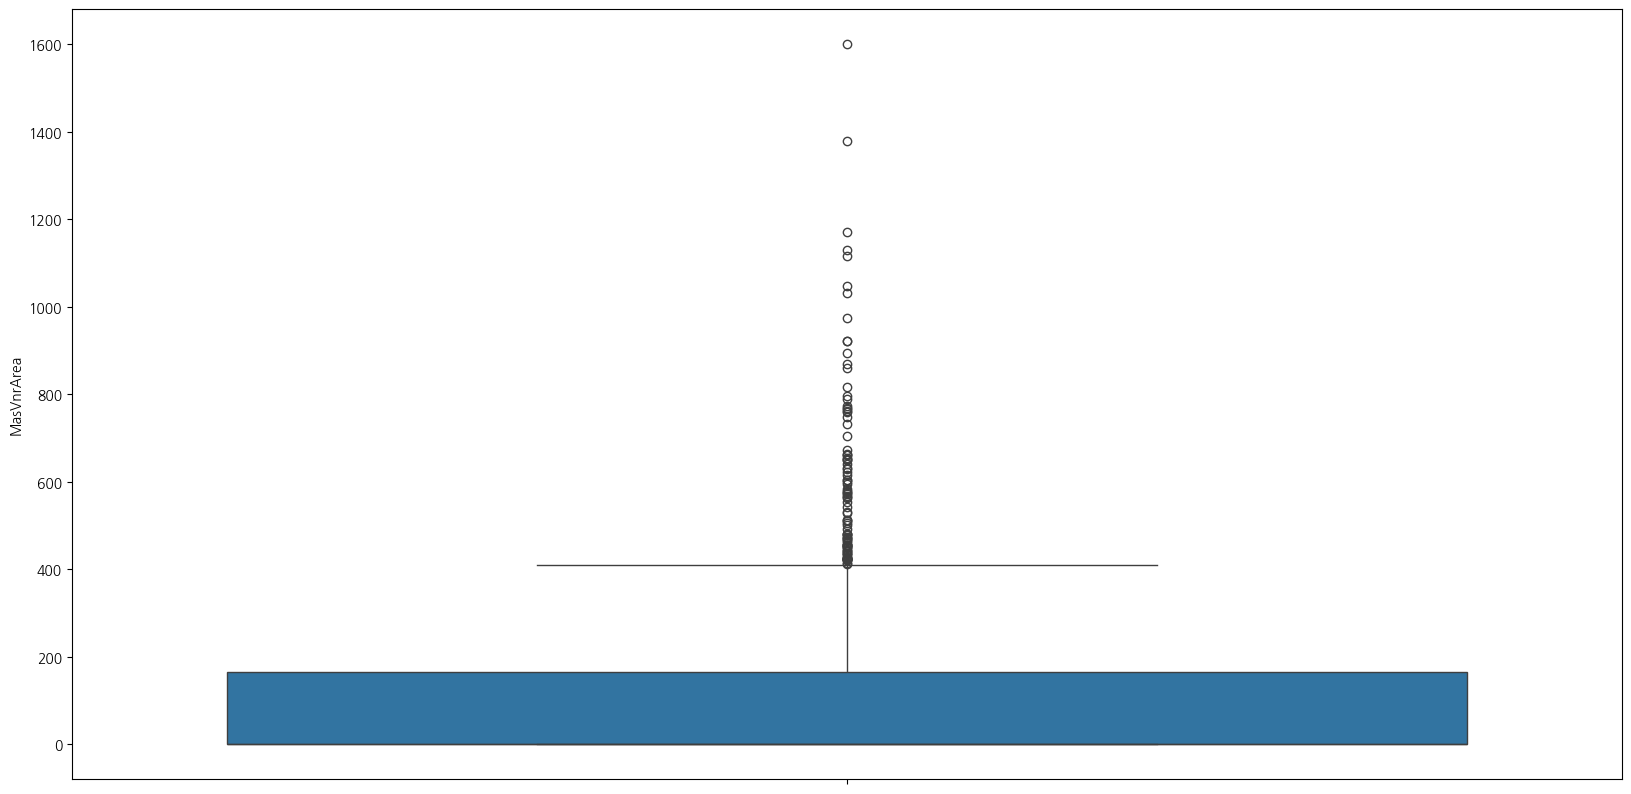

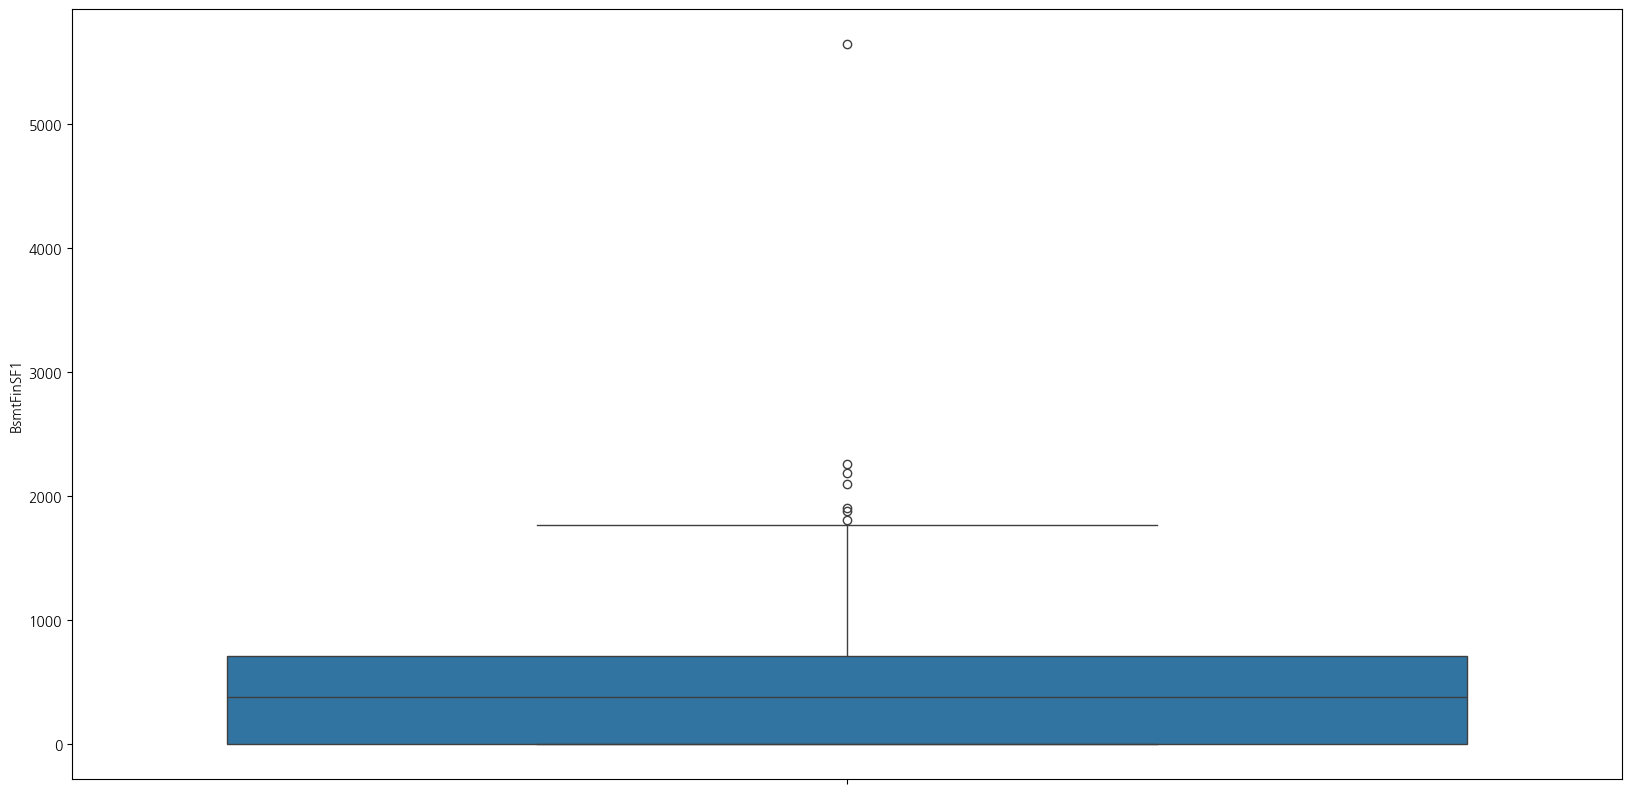

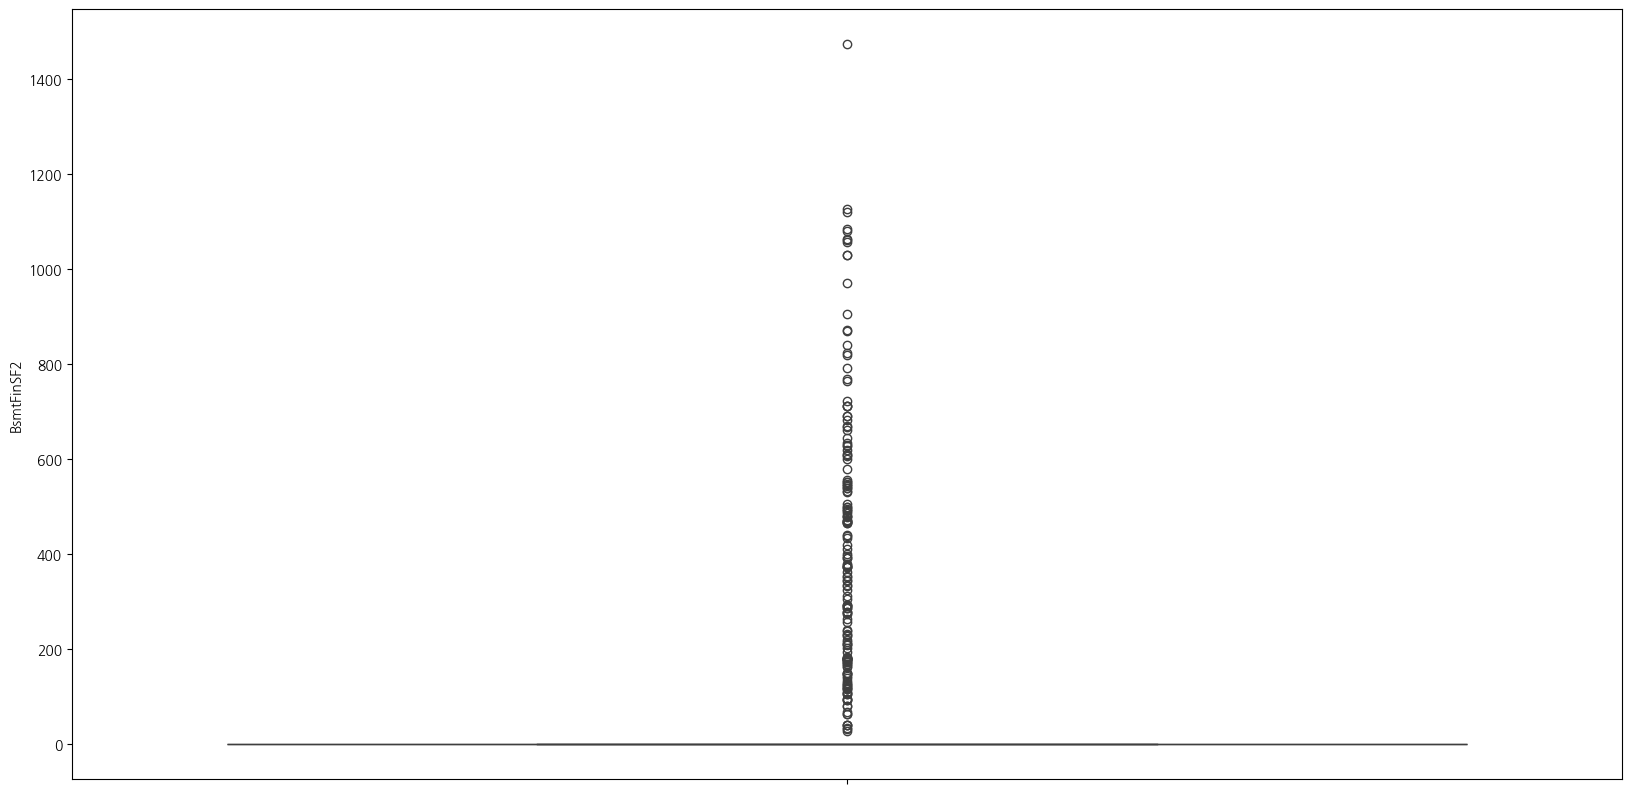

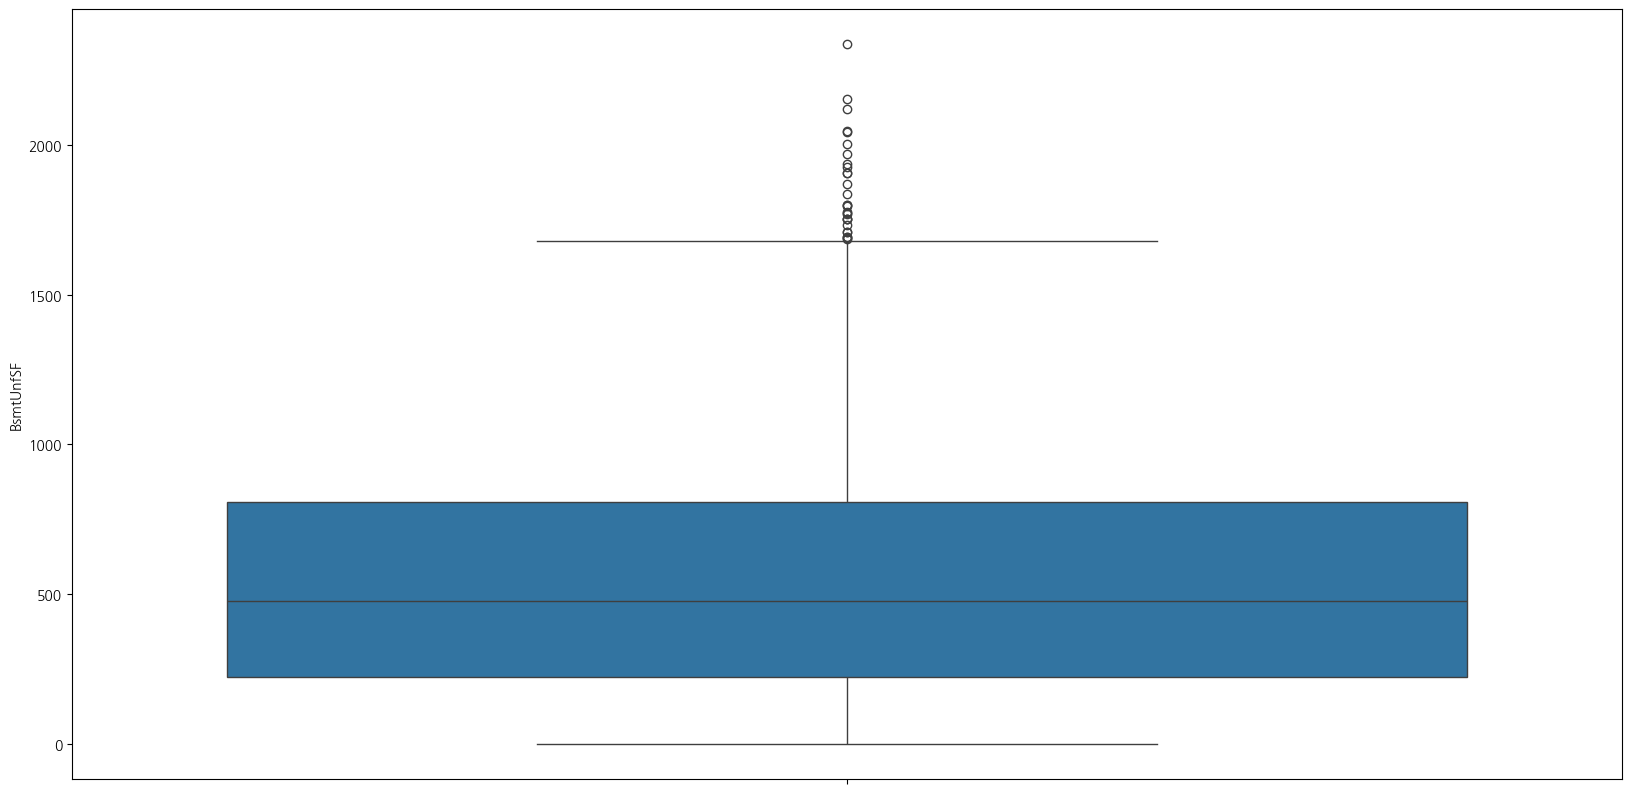

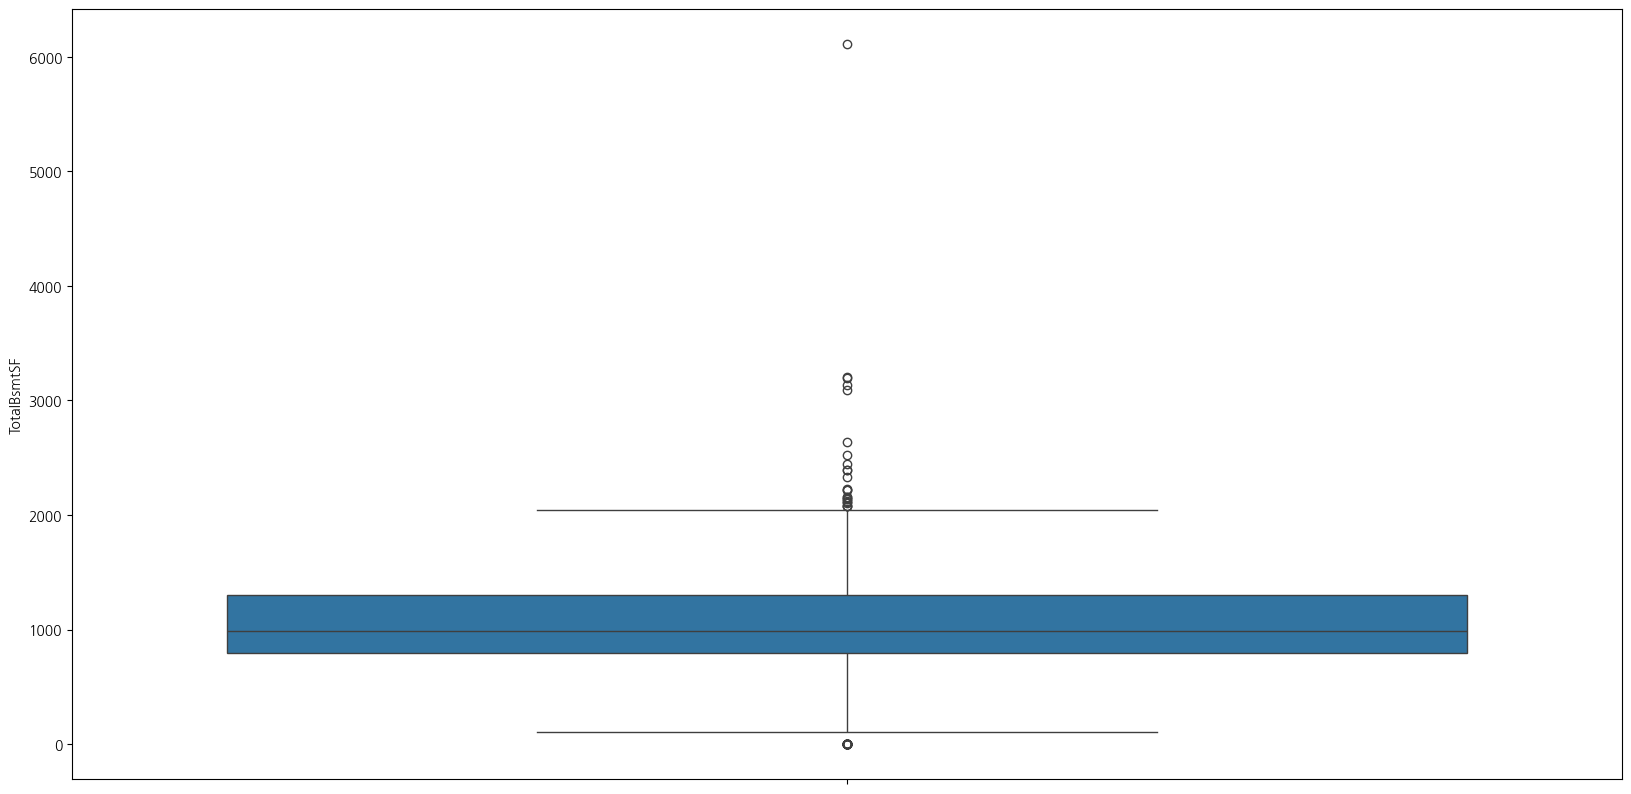

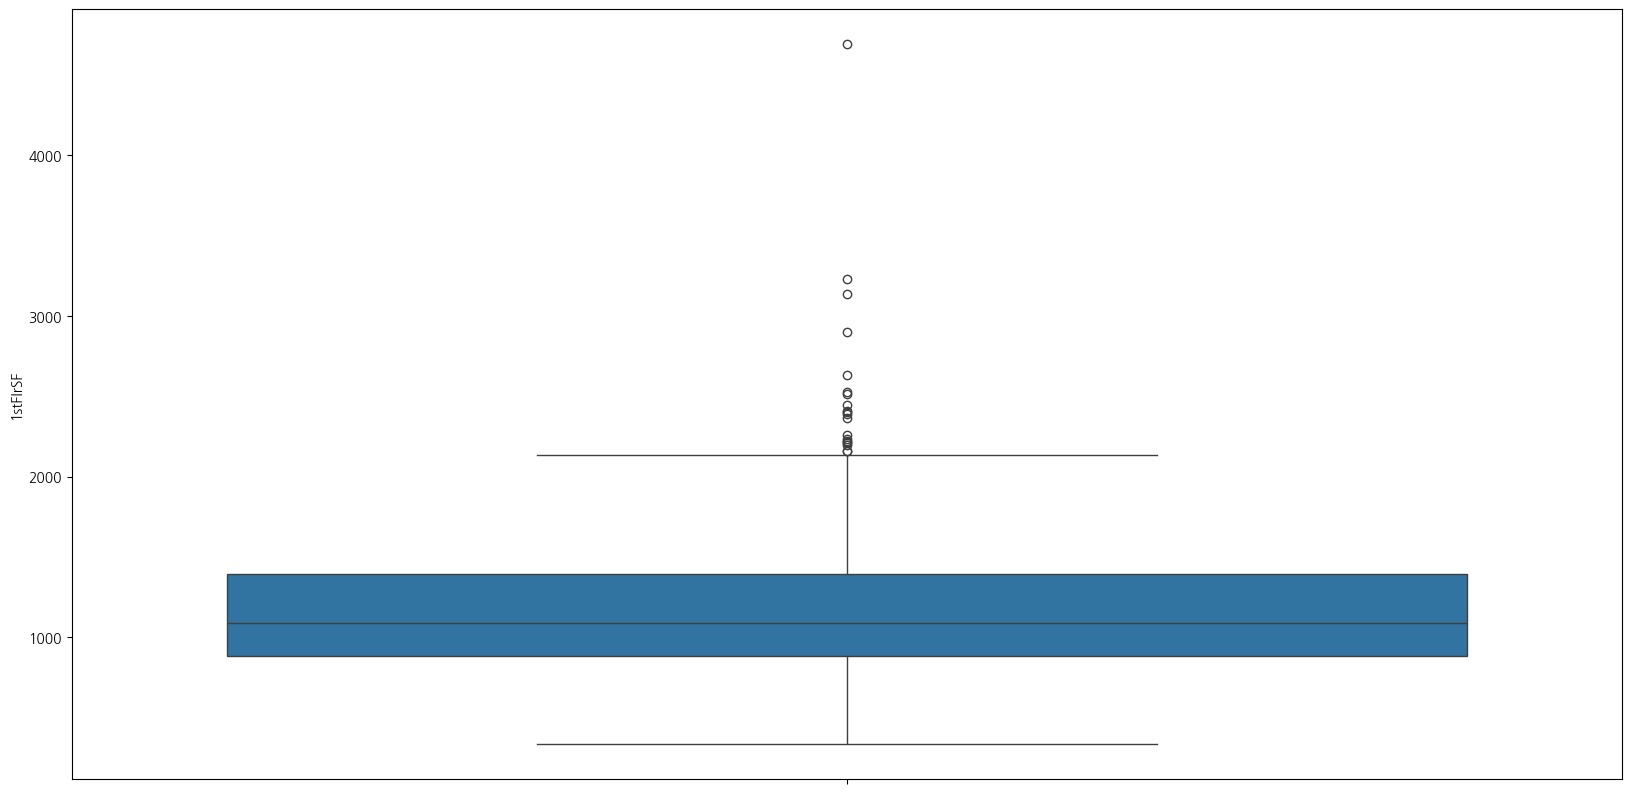

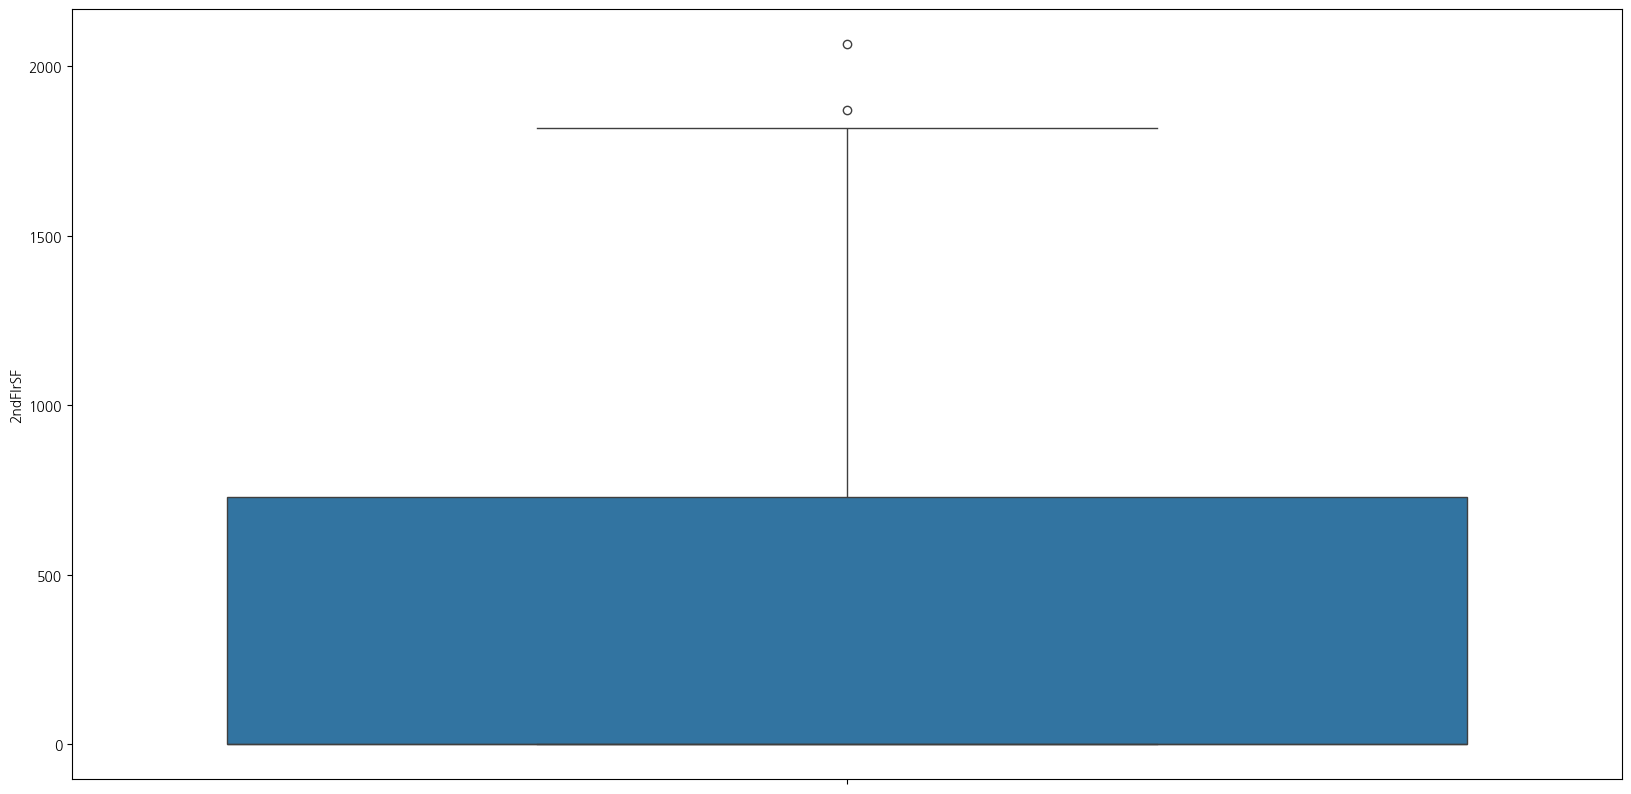

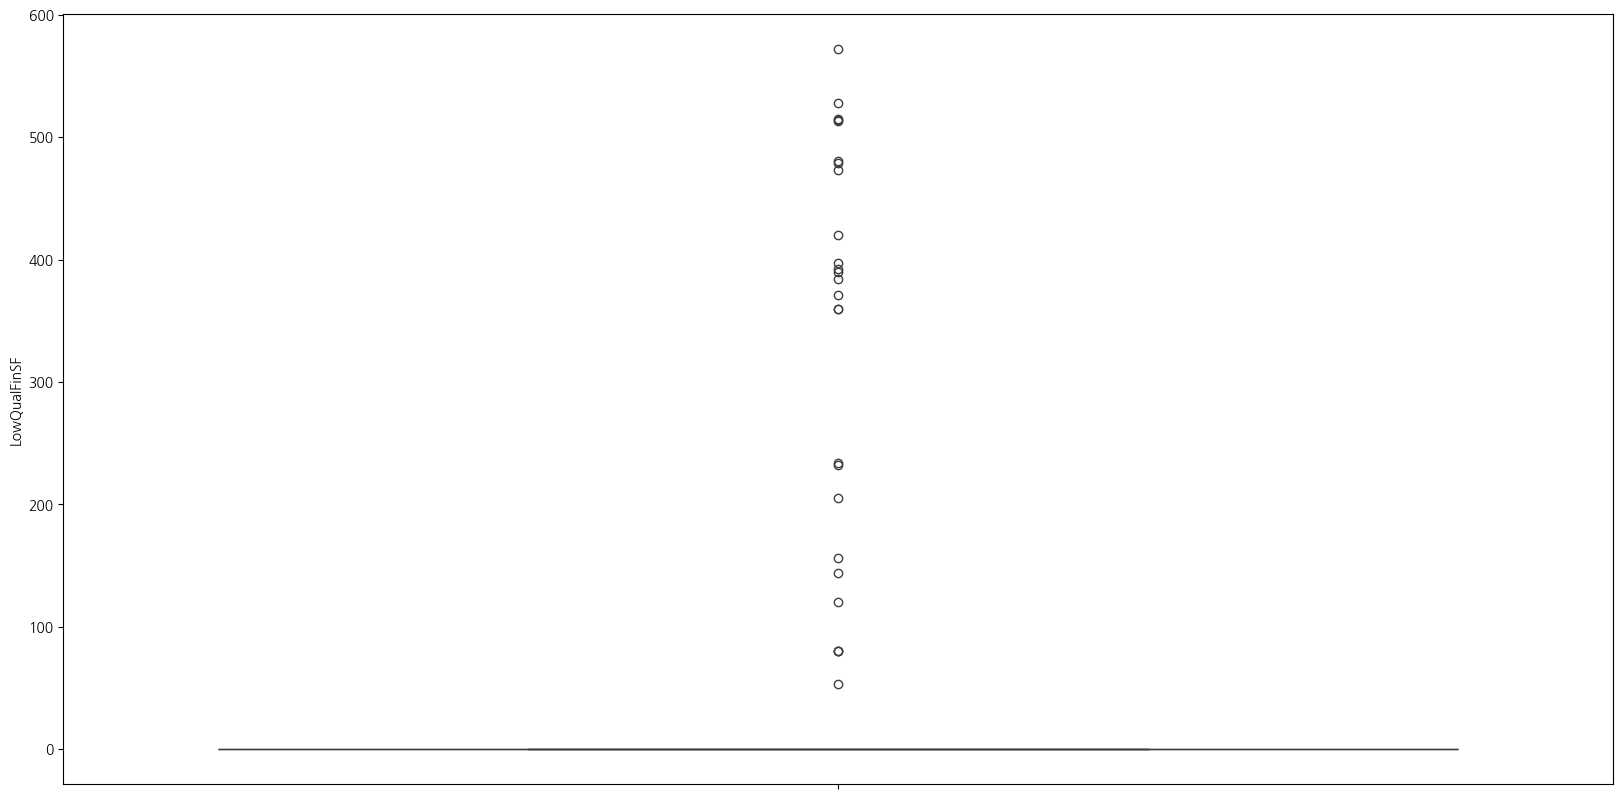

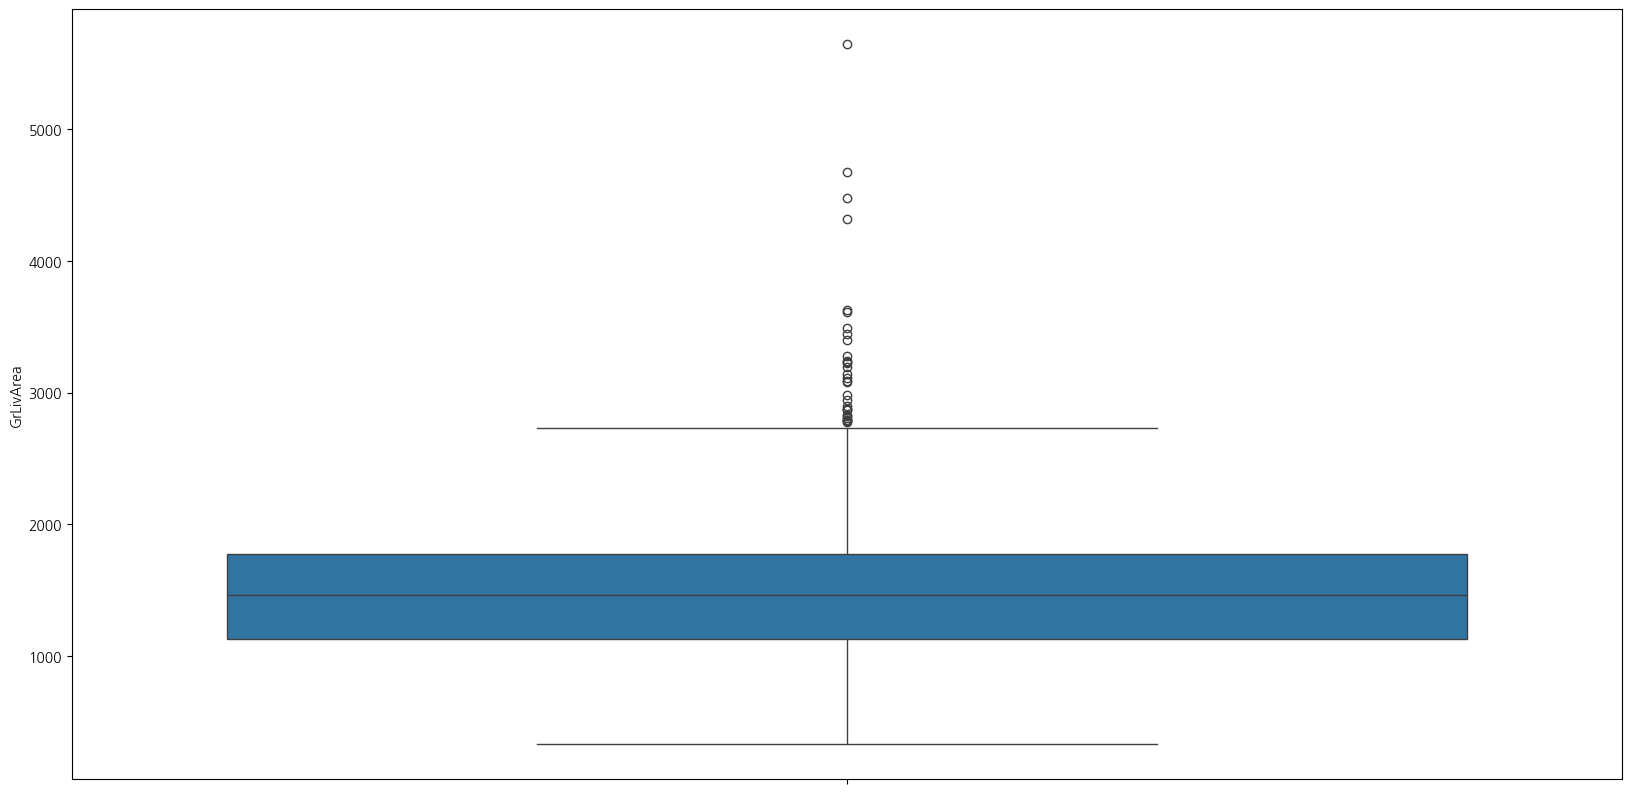

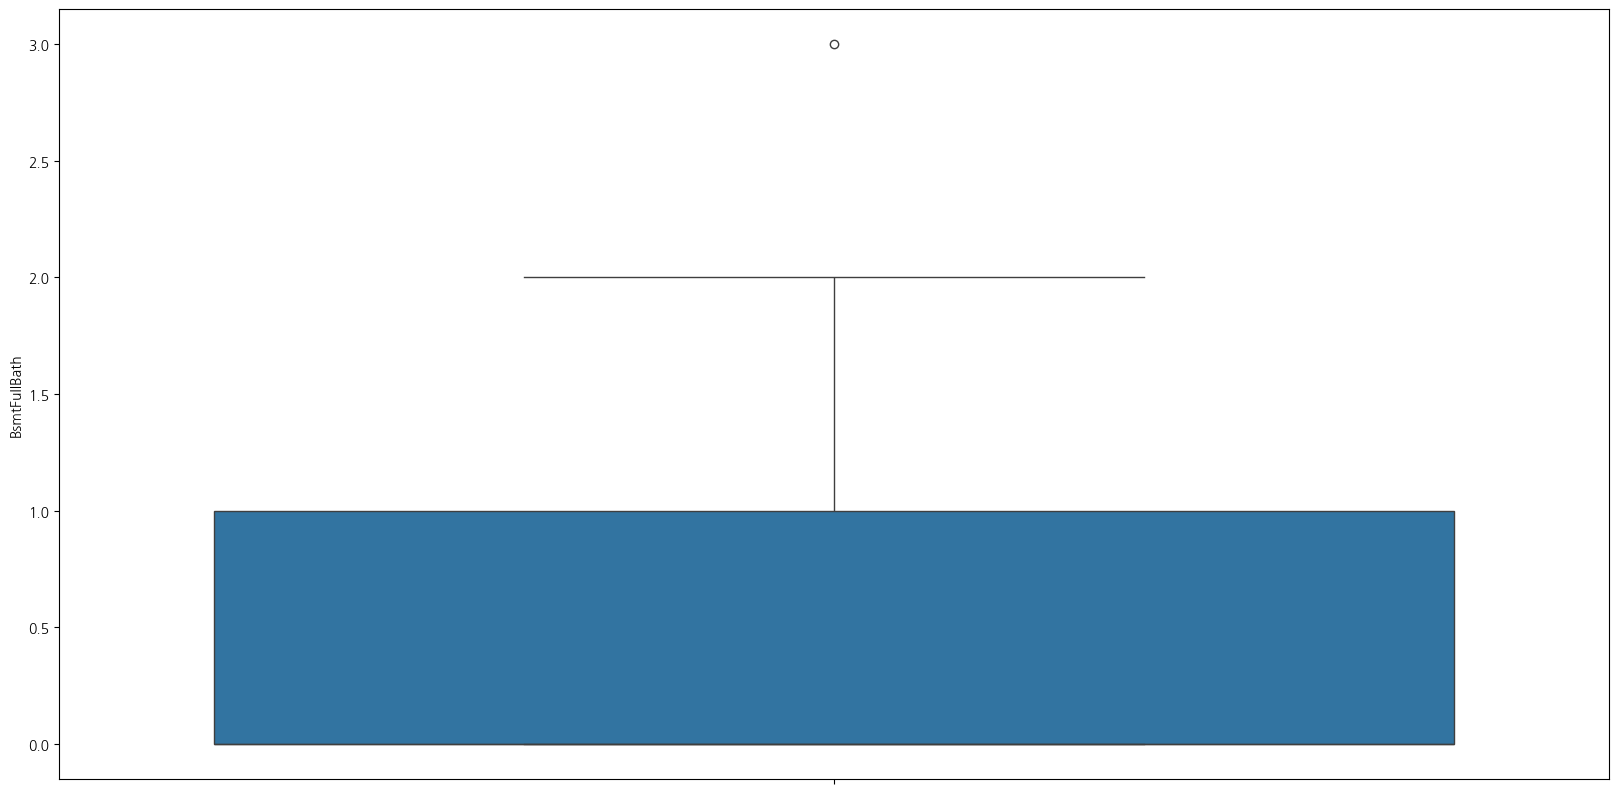

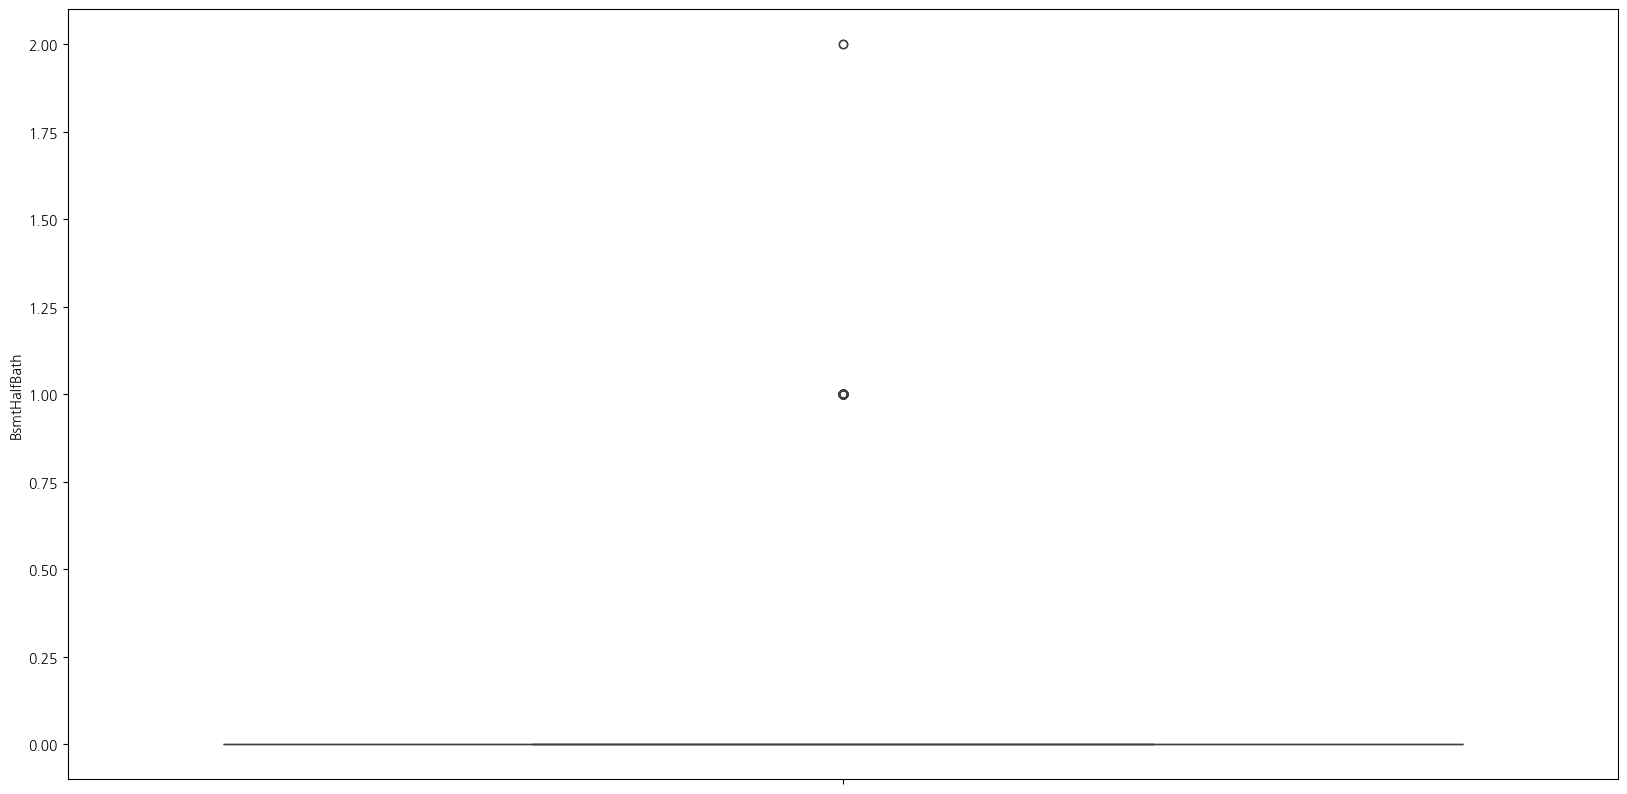

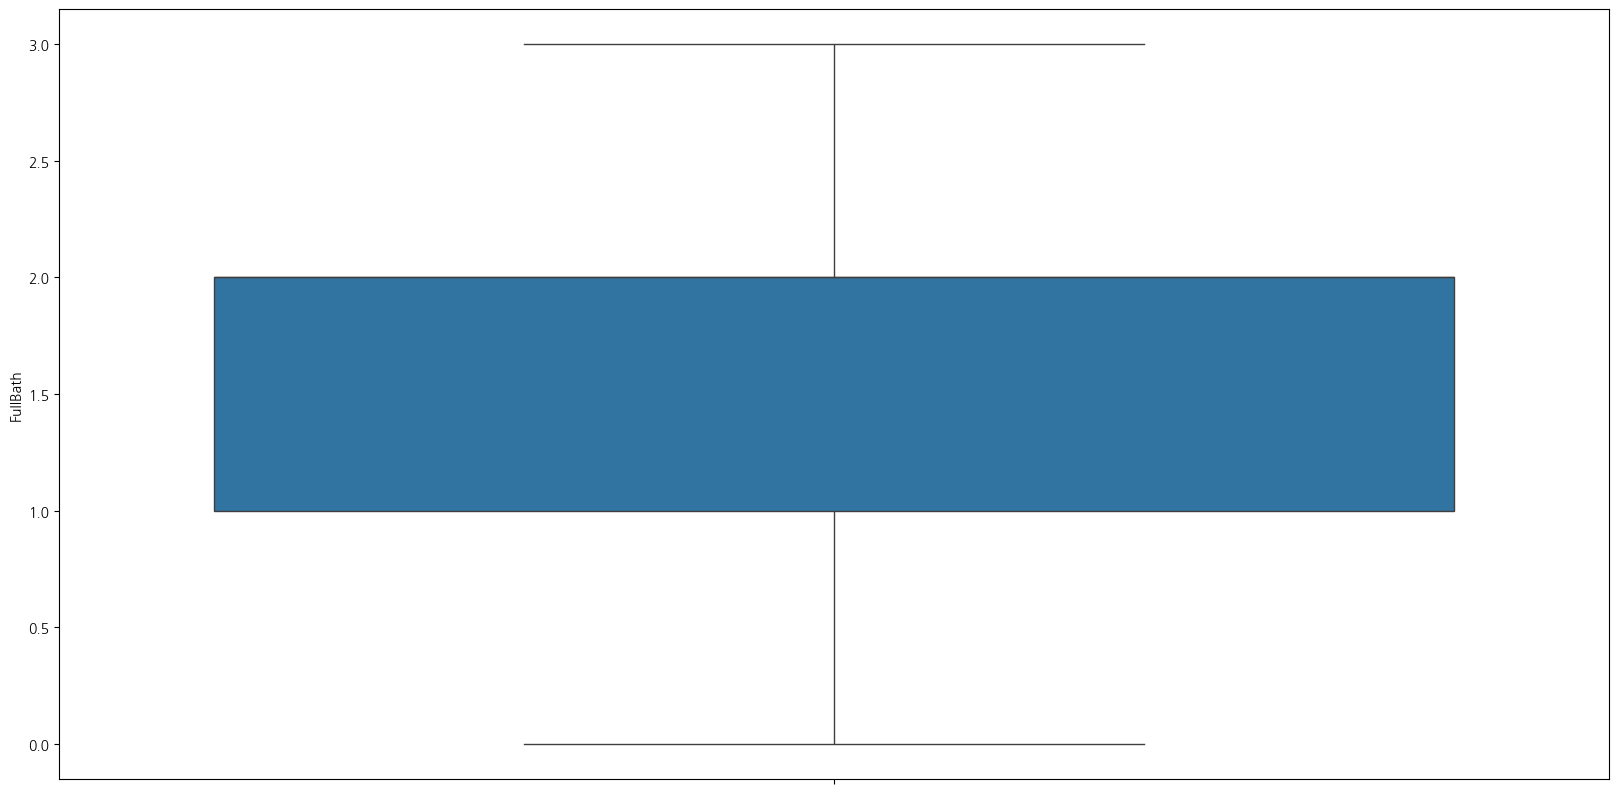

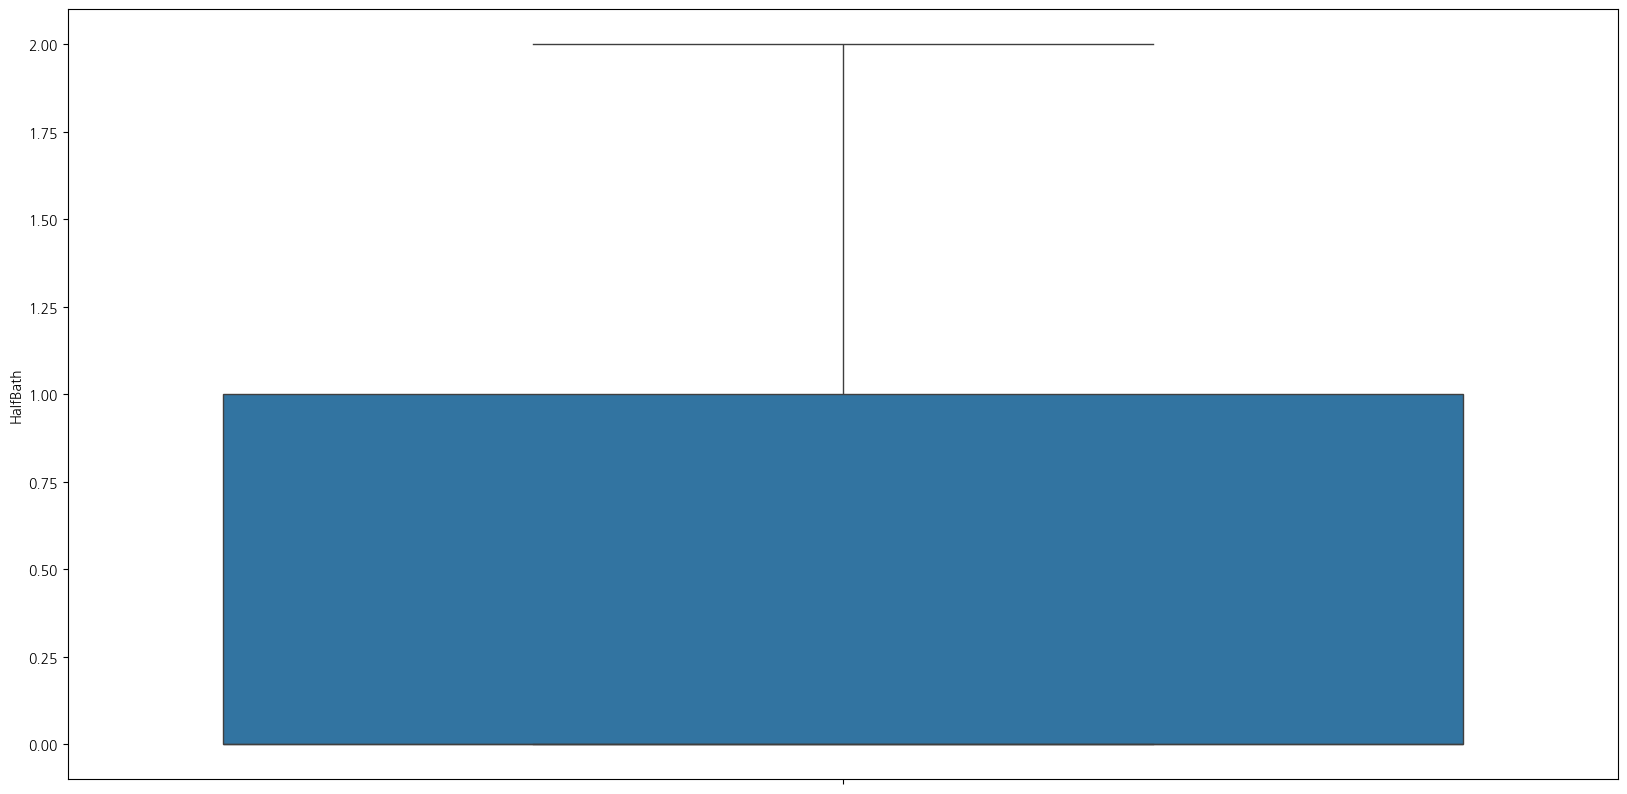

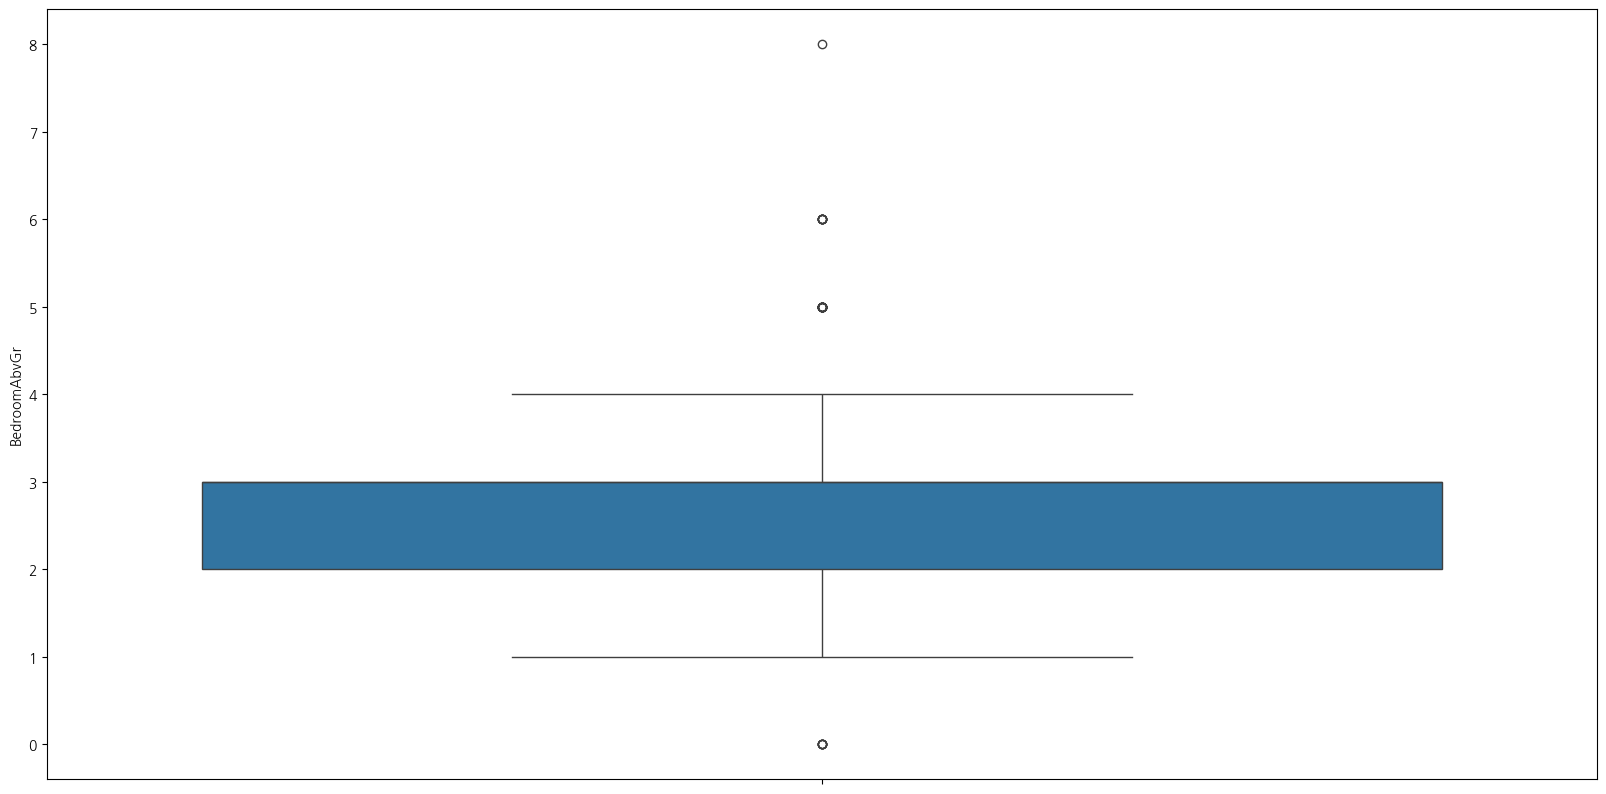

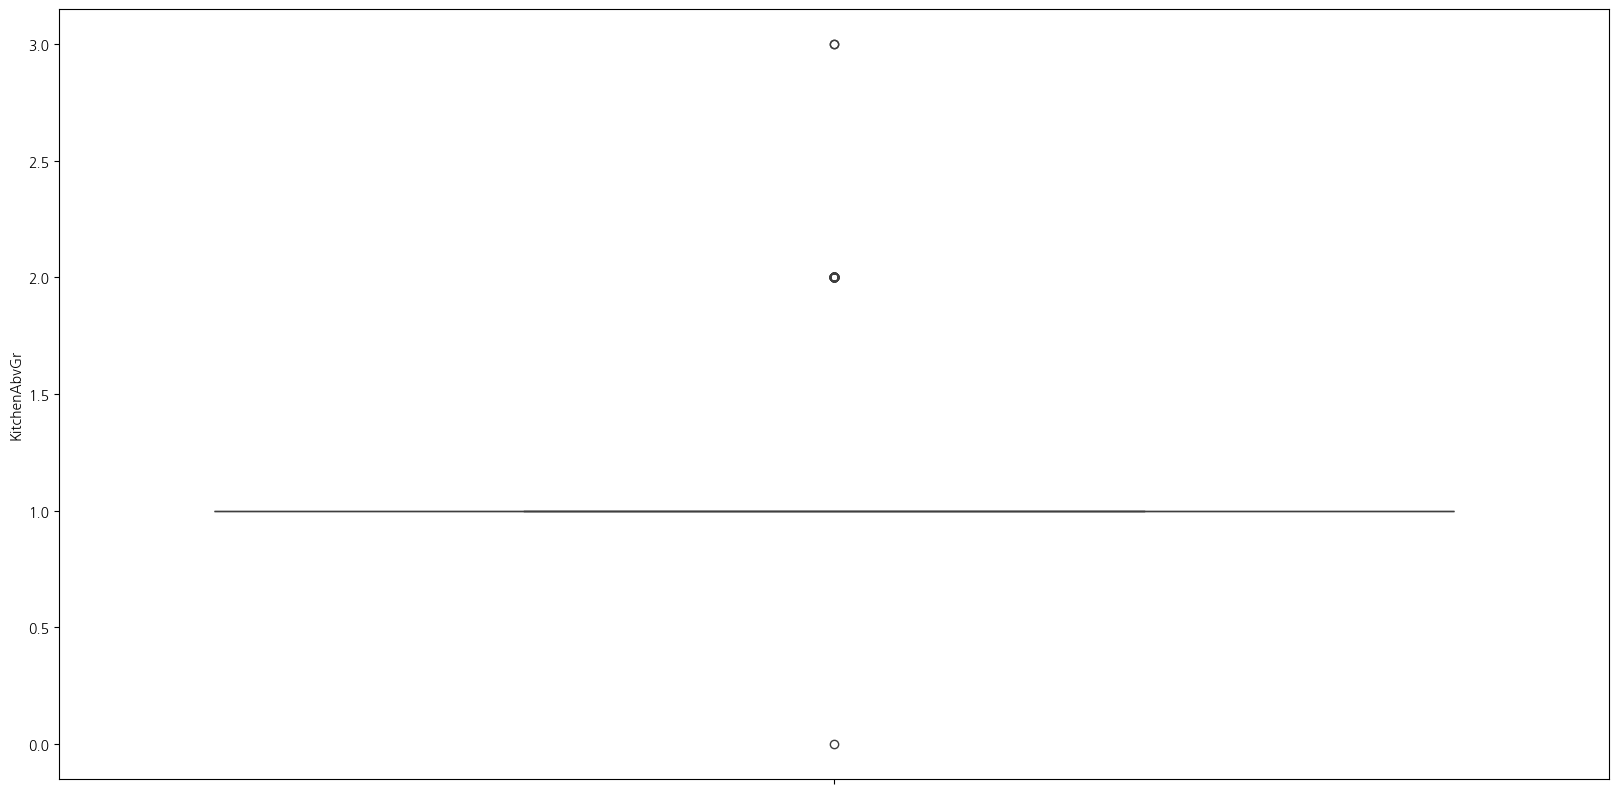

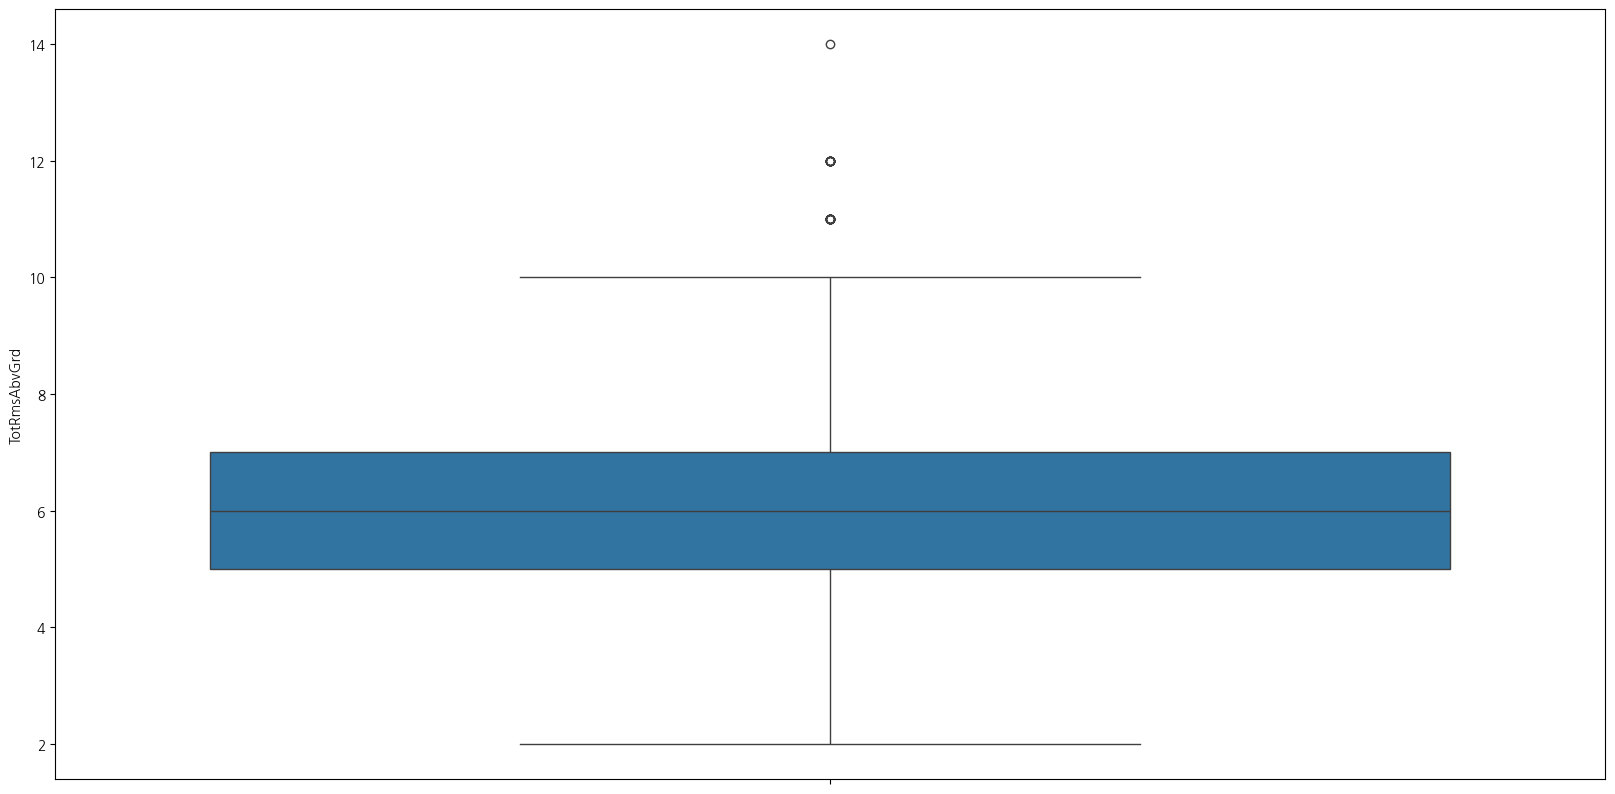

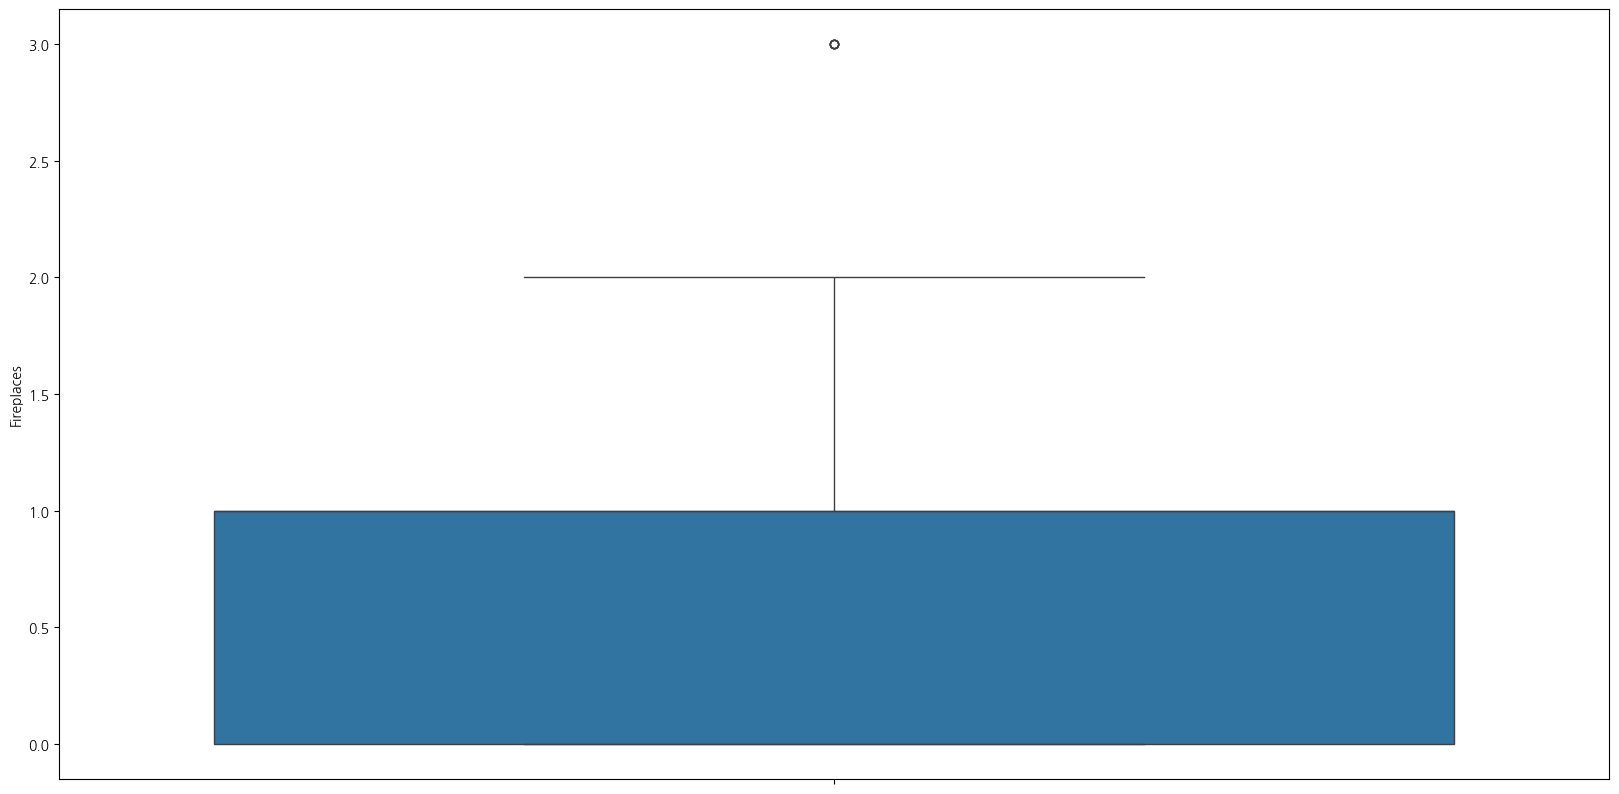

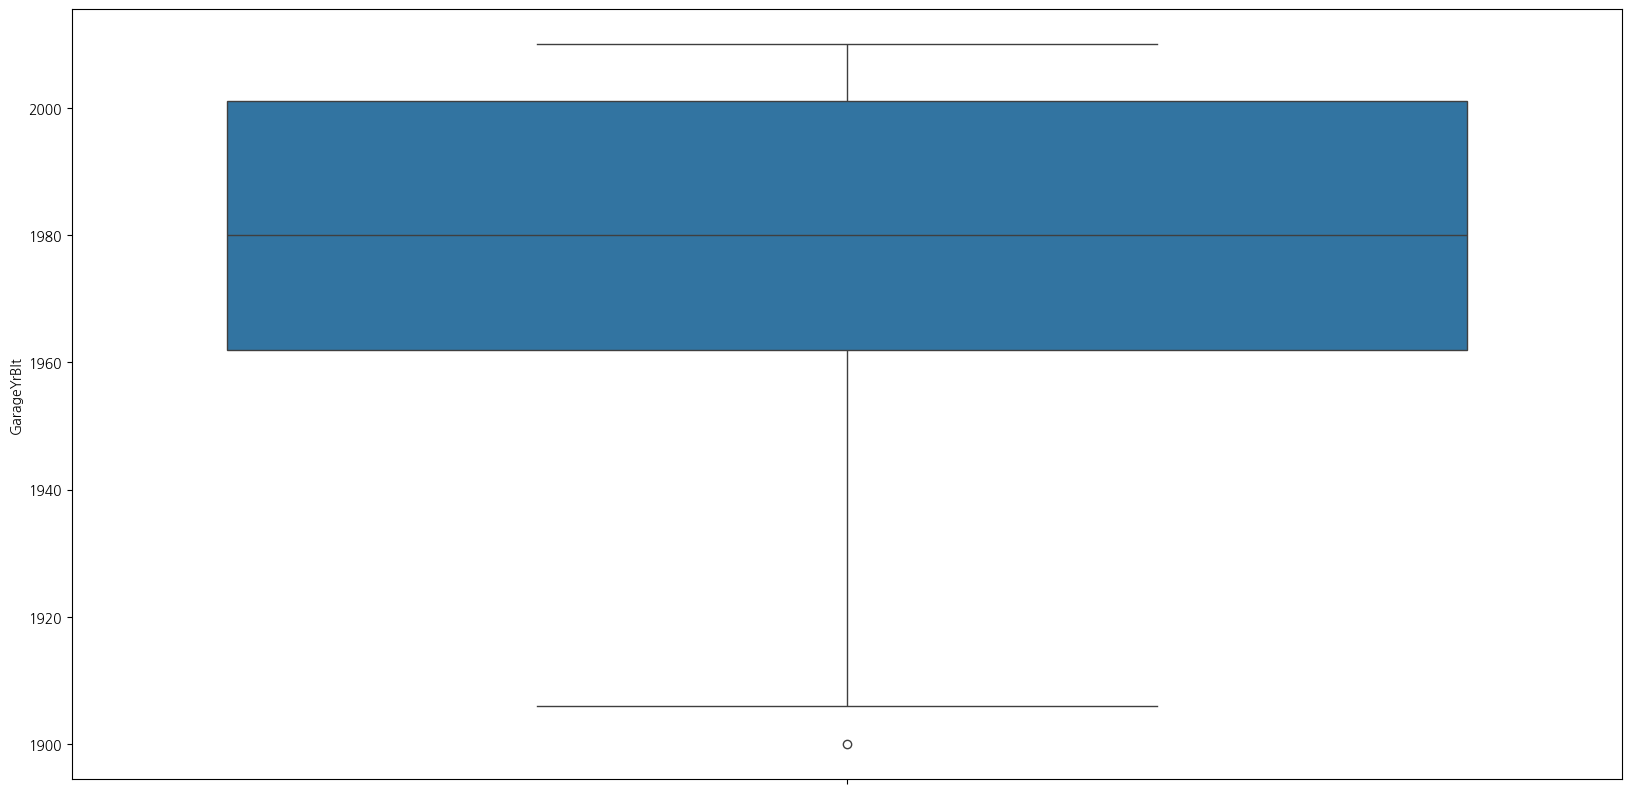

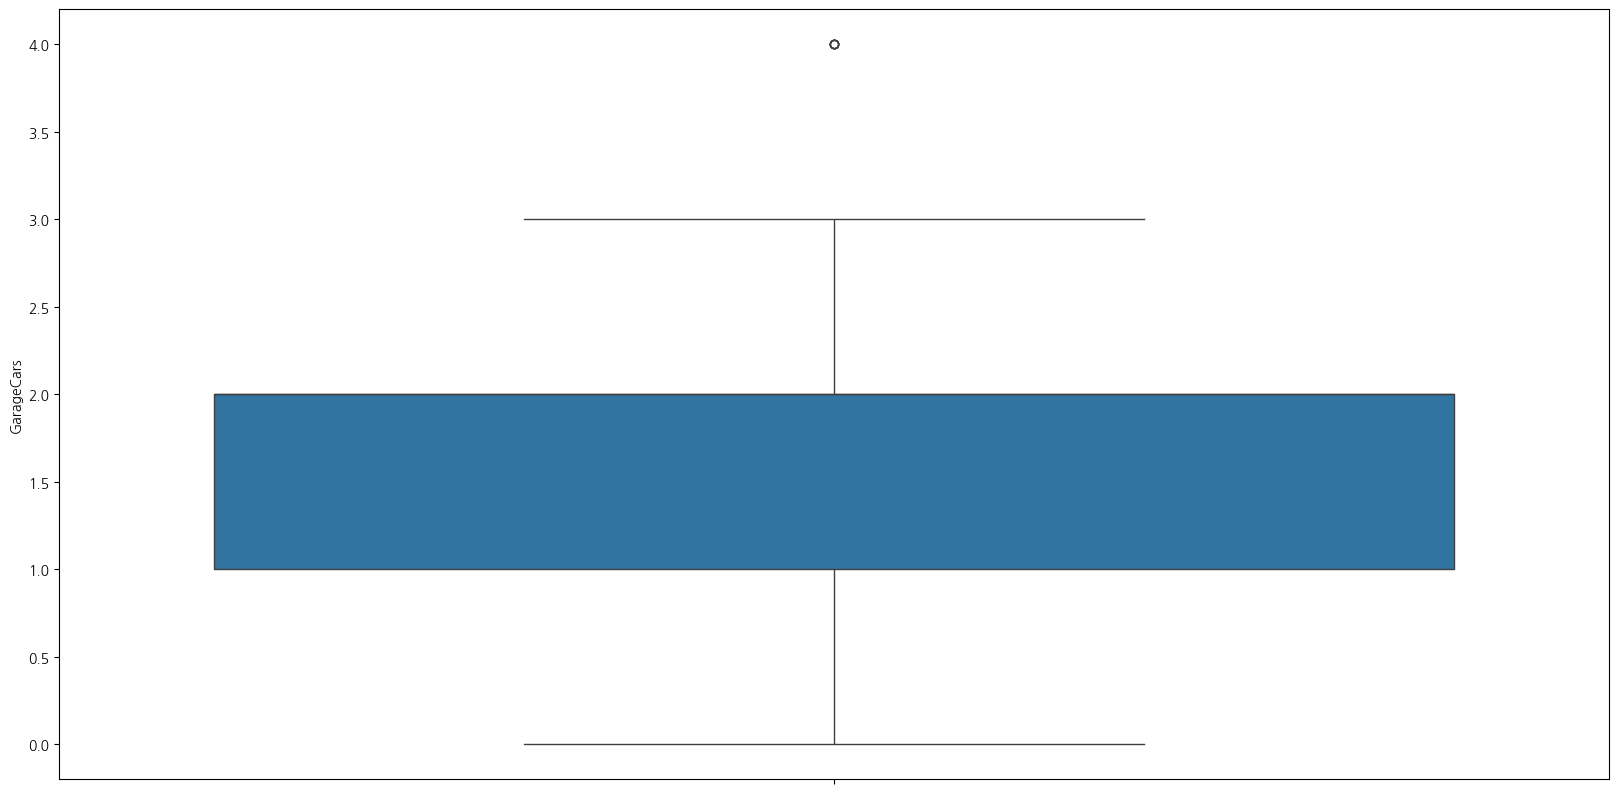

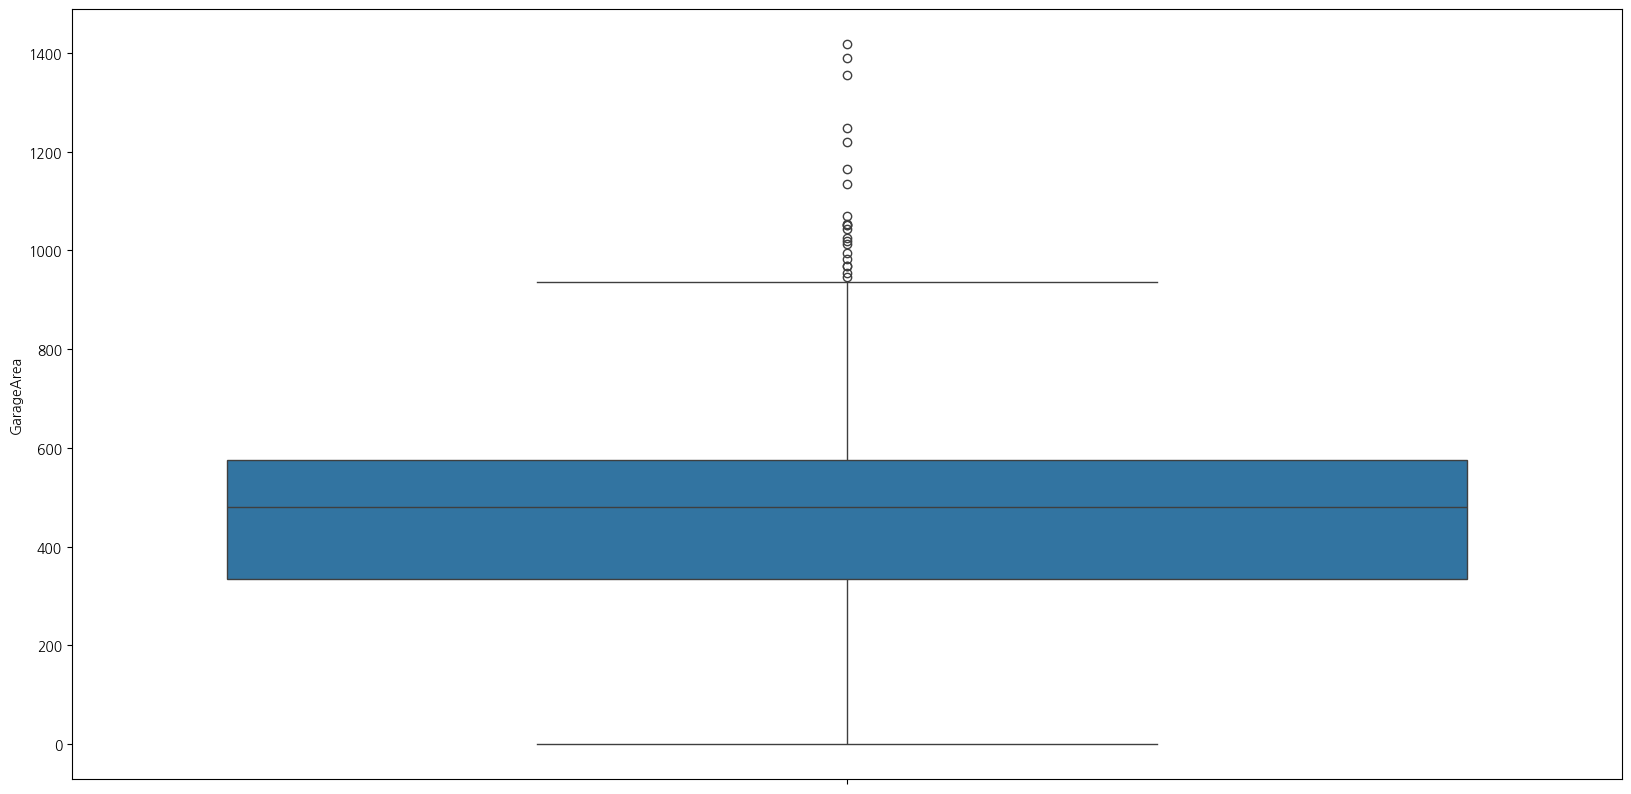

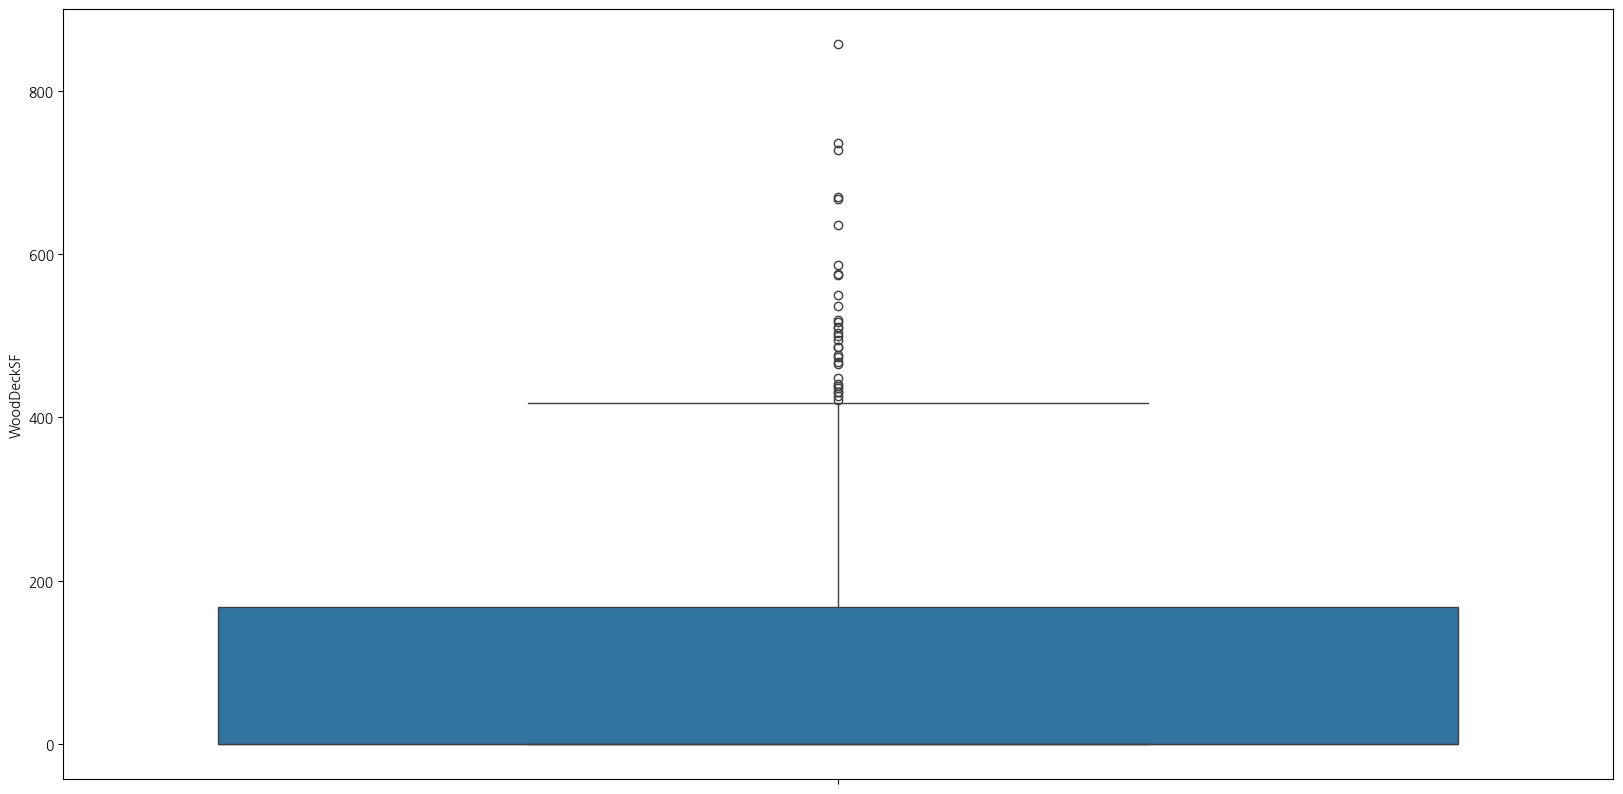

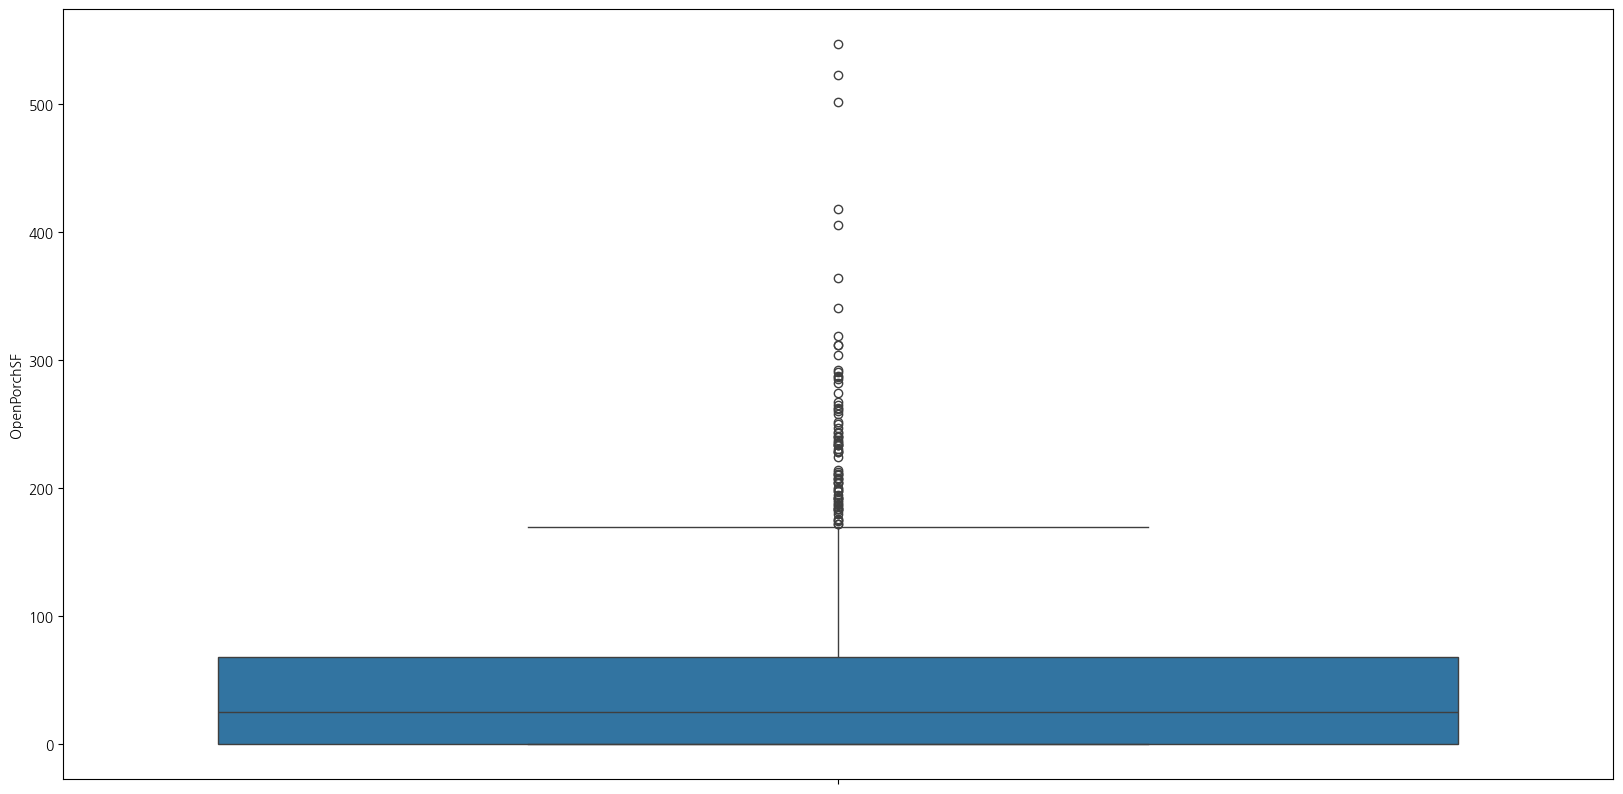

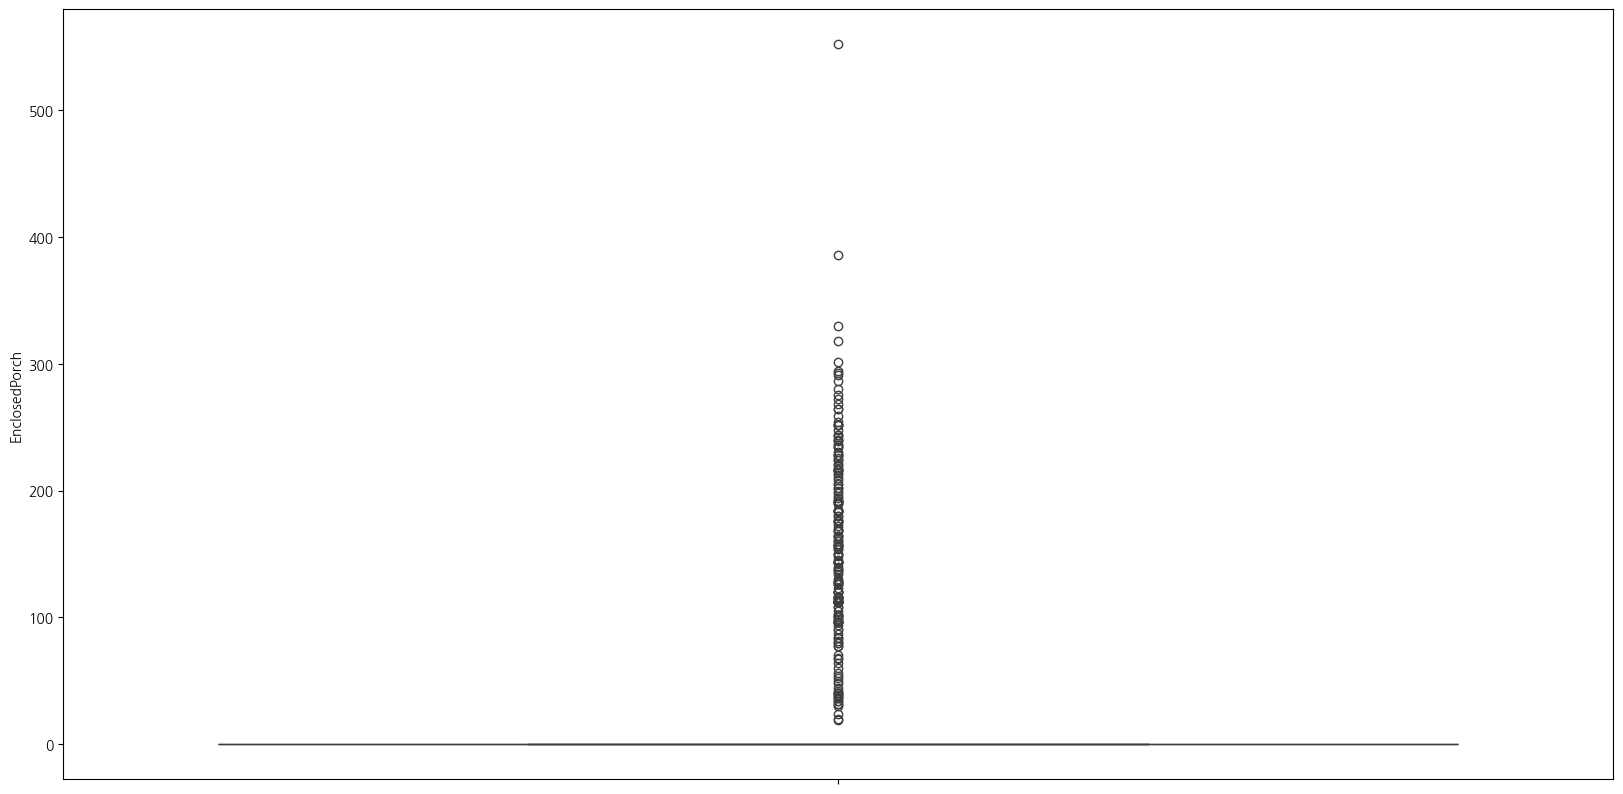

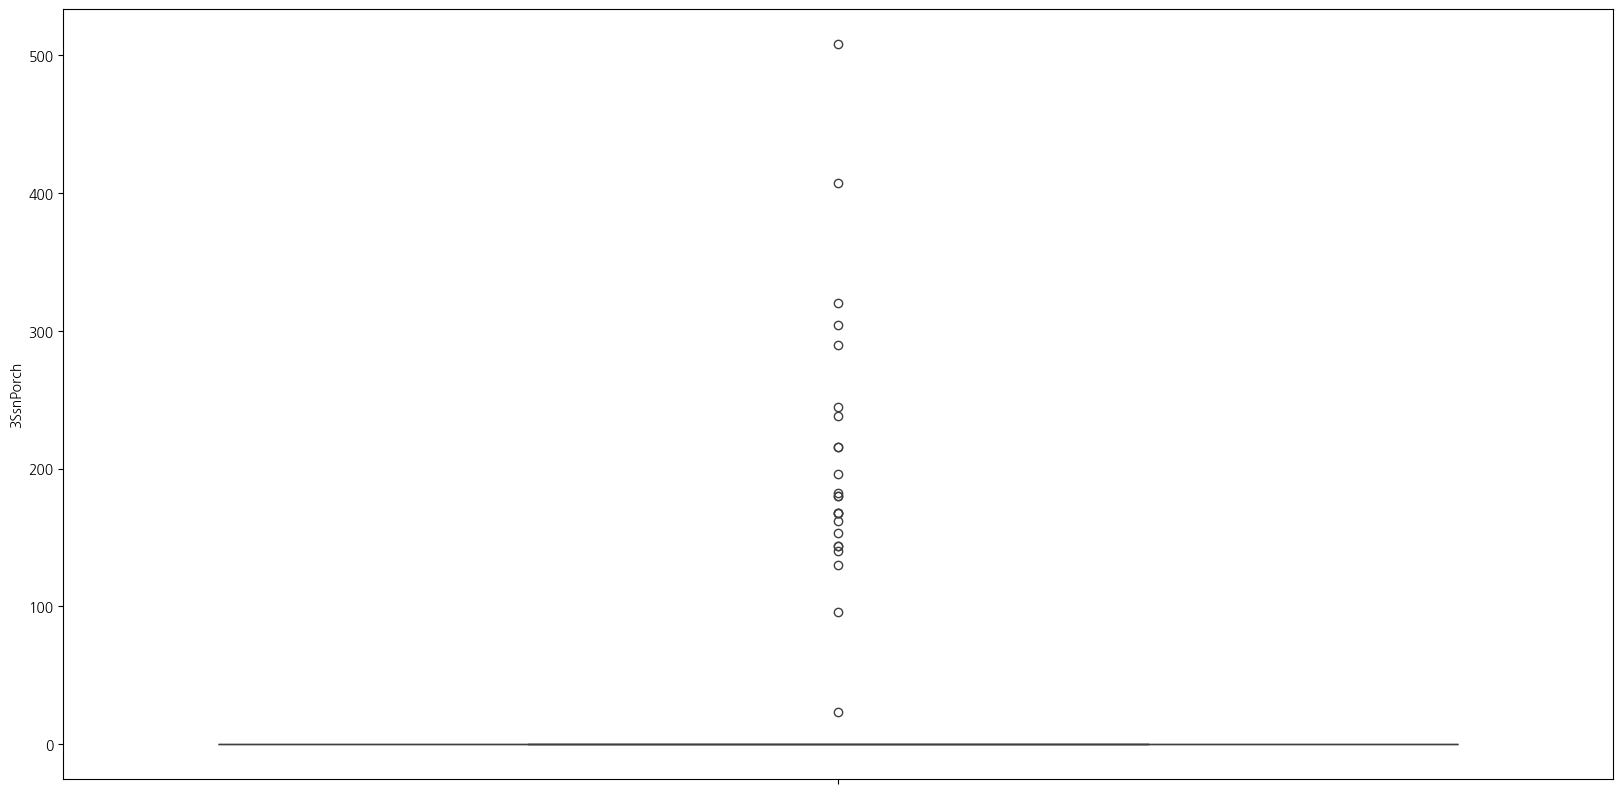

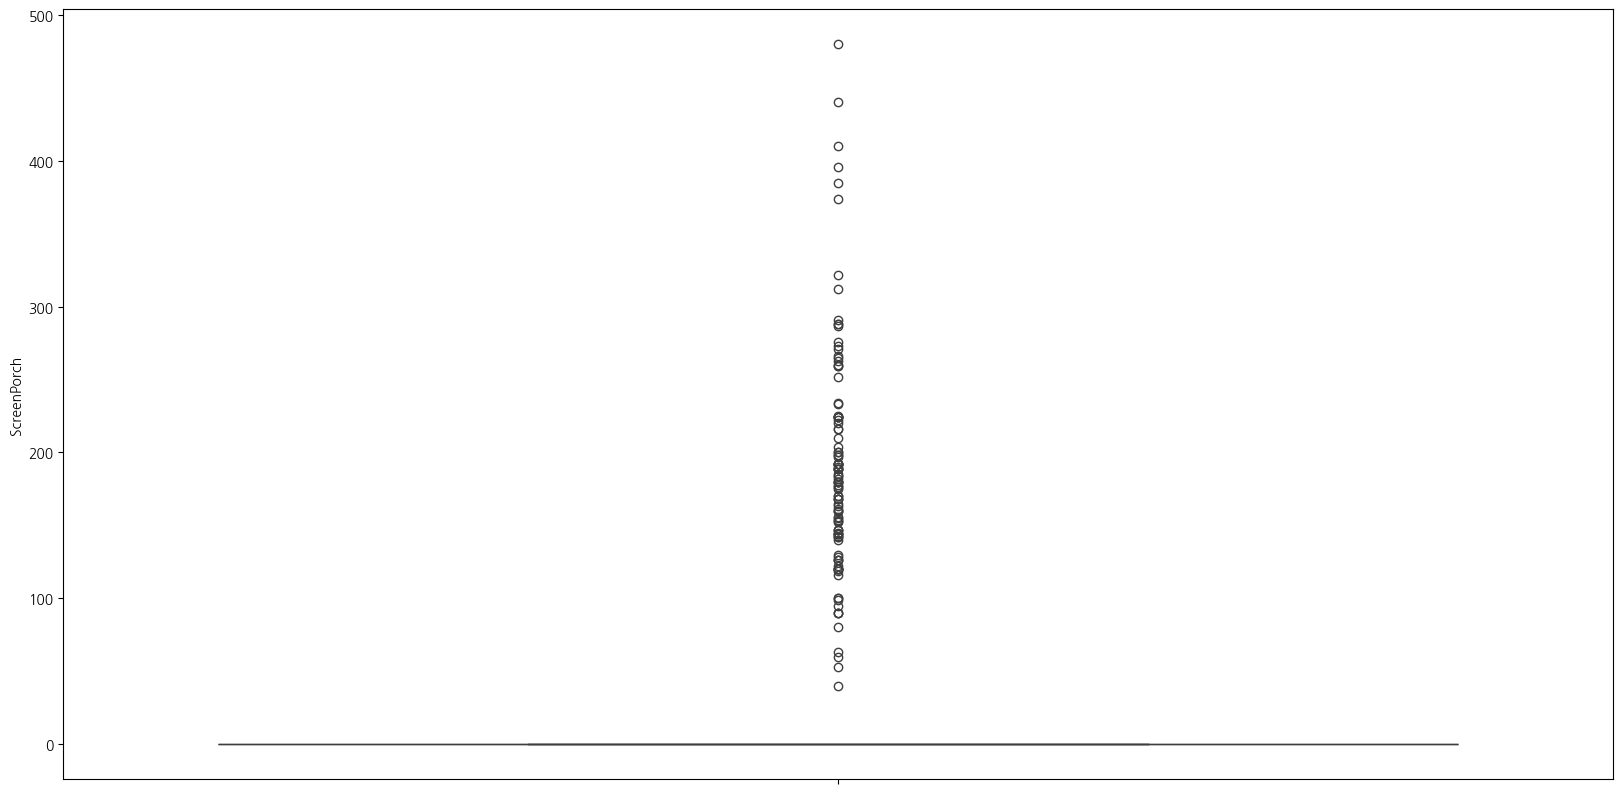

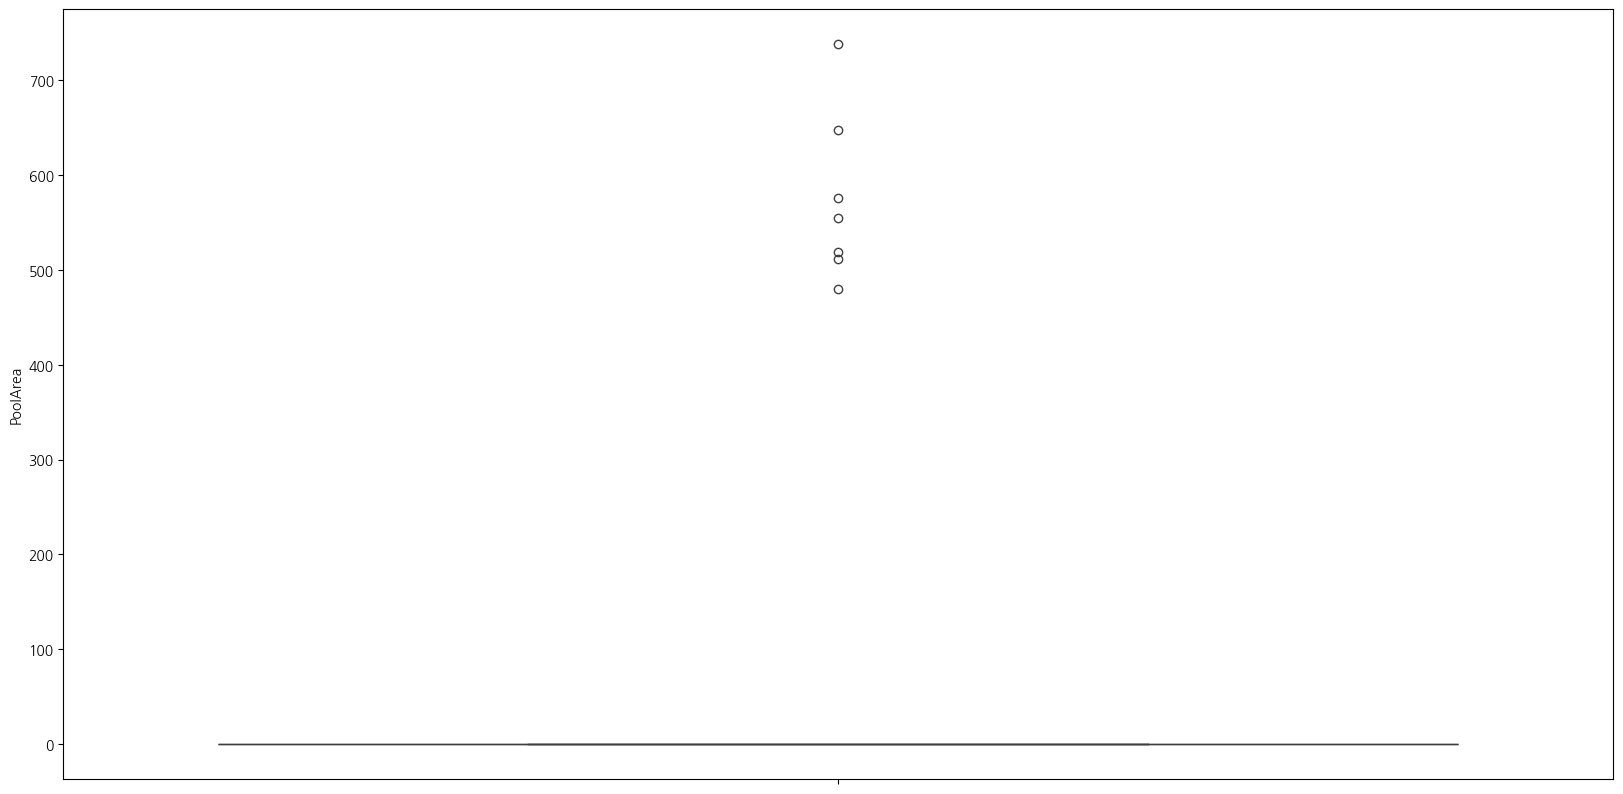

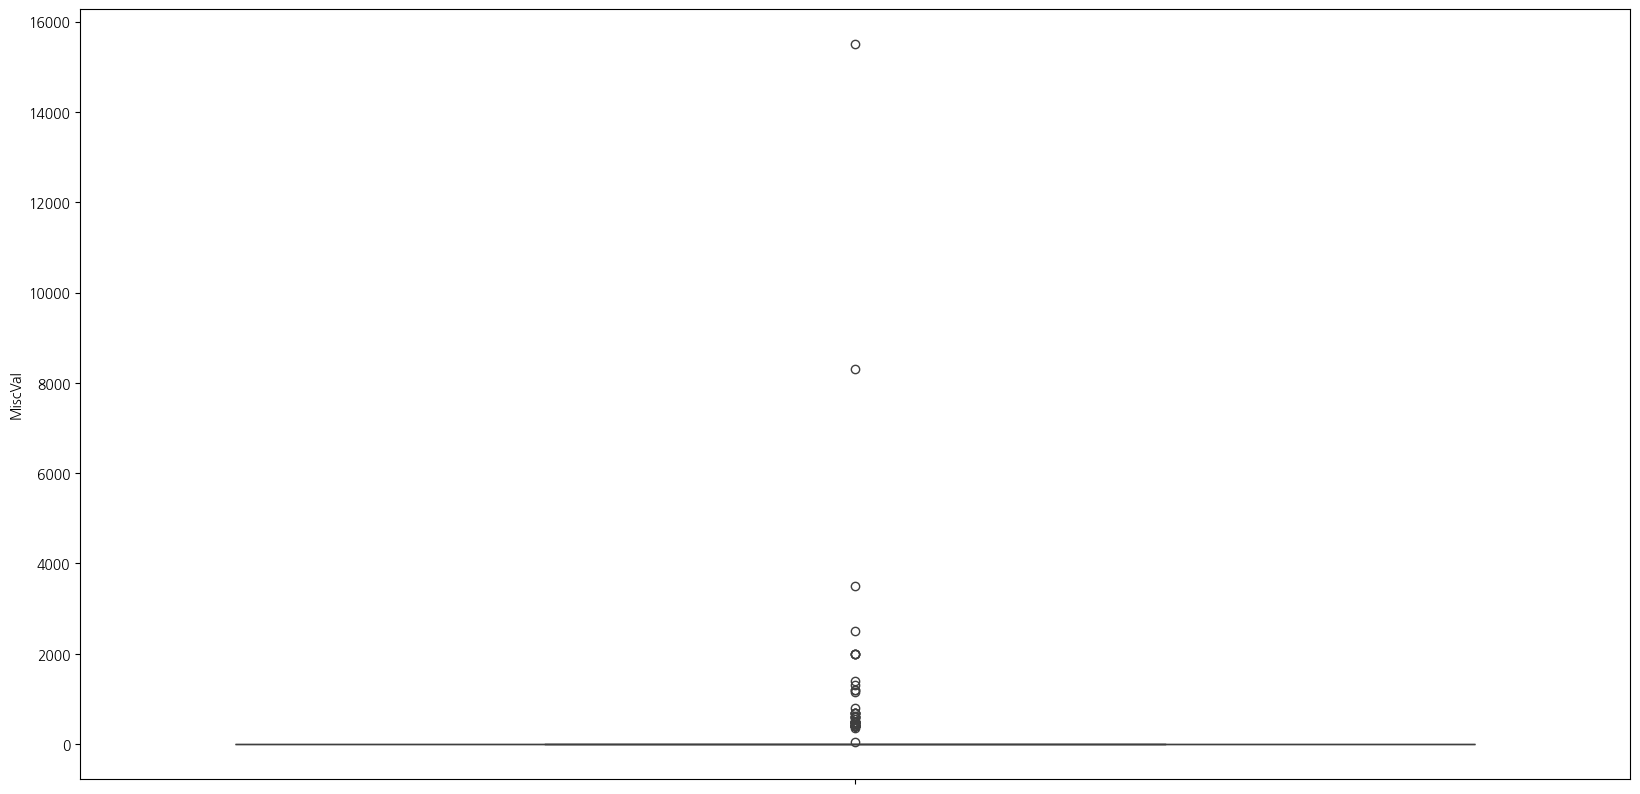

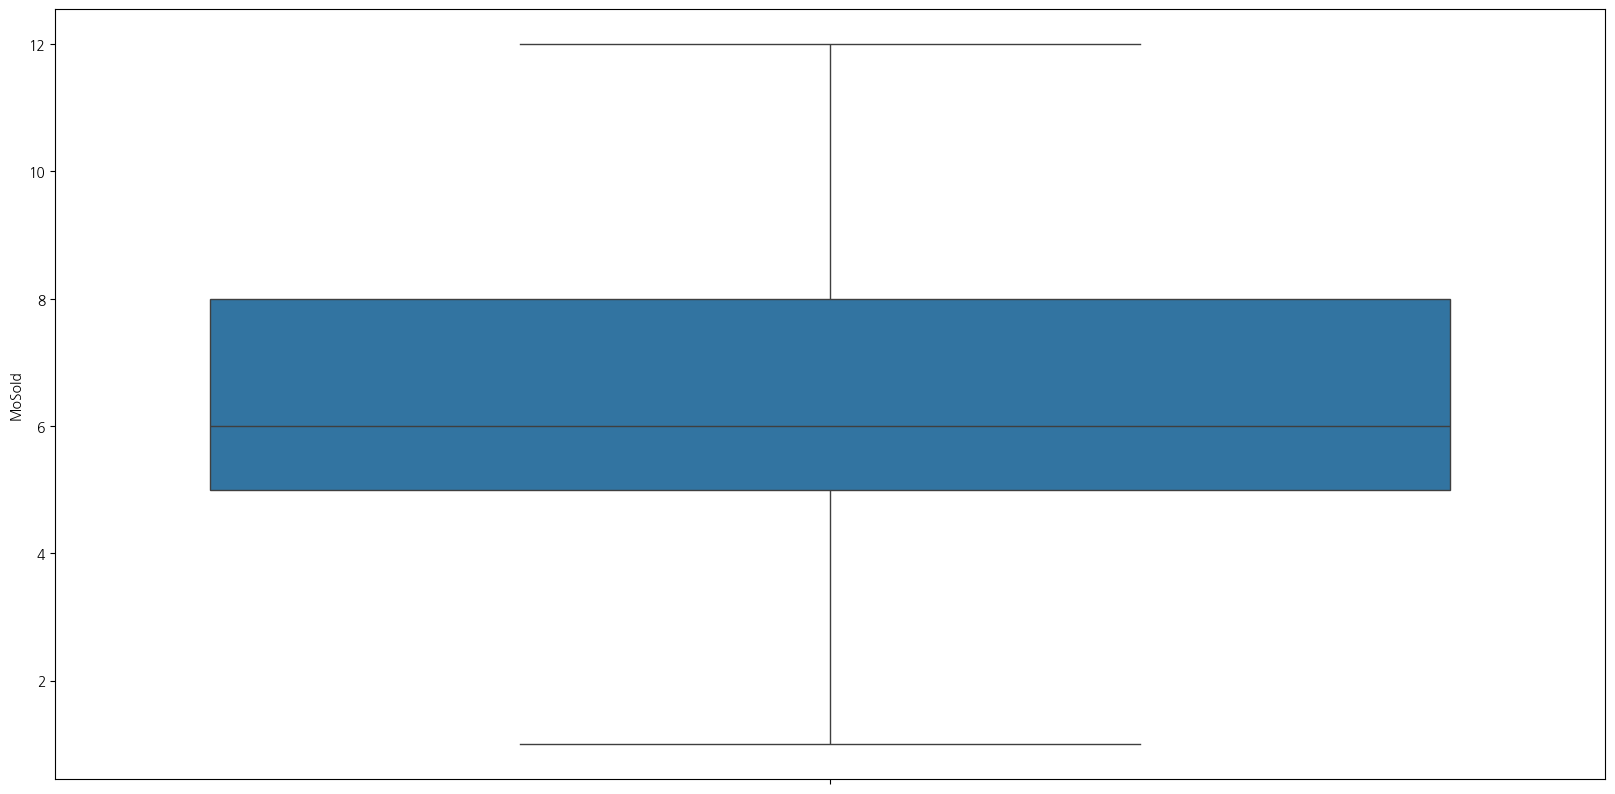

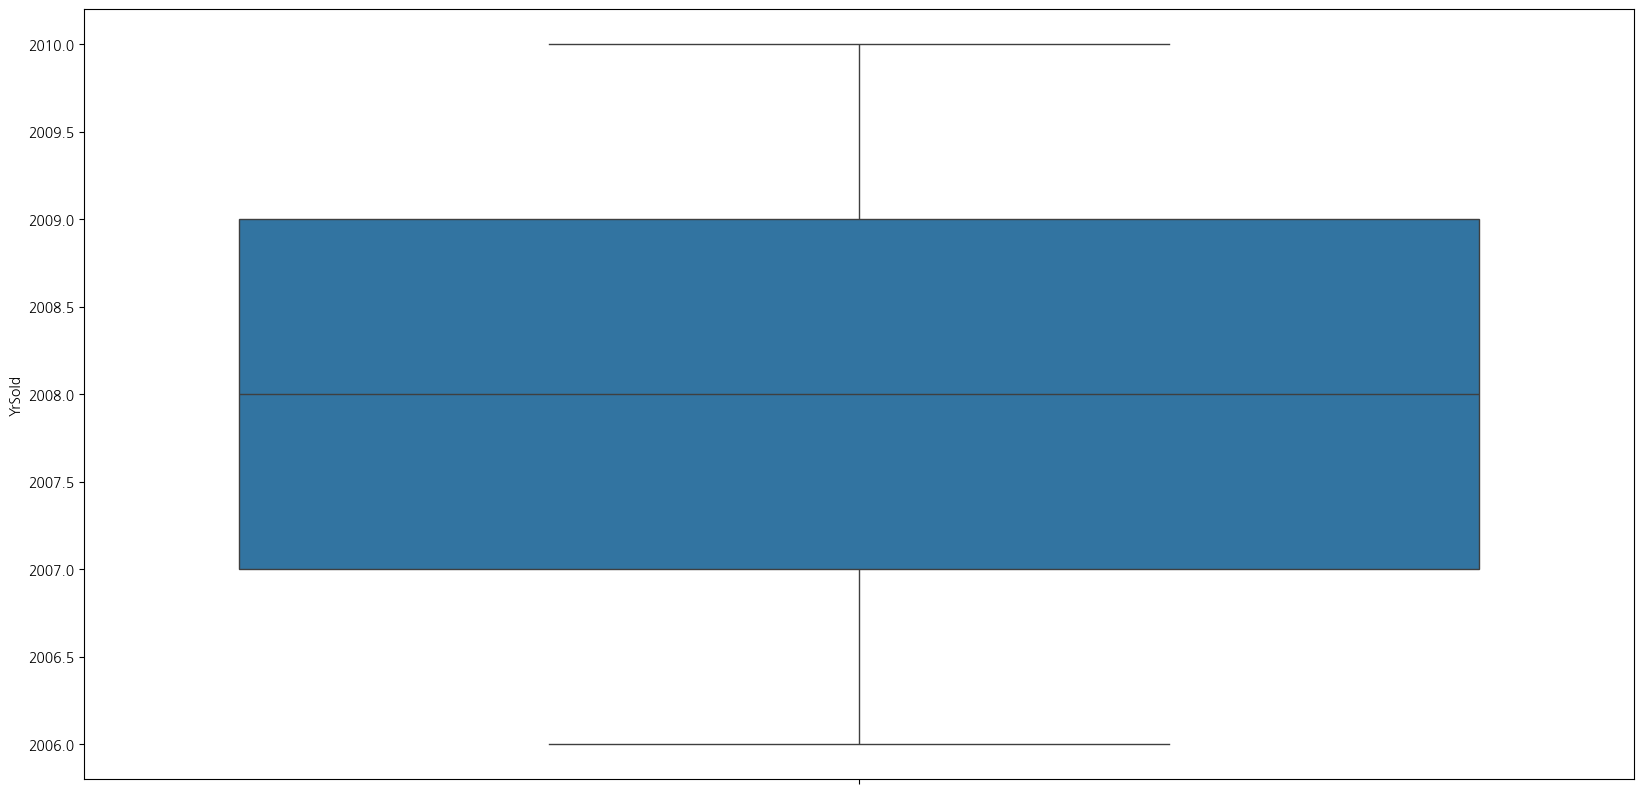

In [31]:
for col in num_cols:
    plt.figure(figsize=(20,10))
    sns.boxplot(data[col])
    plt.show()

# 범주형: one-hot, 수치형: robustscale 처리

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
rs = RobustScaler()
rs.fit(X_train[num_cols])
X_train_num = rs.transform(X_train[num_cols])
X_test_num = rs.transform(X_test[num_cols])
rs_X_train_num = pd.DataFrame(X_train_num, columns=num_cols, index=X_train[num_cols].index)
rs_X_test_num = pd.DataFrame(X_test_num, columns=num_cols, index=X_test[num_cols].index)

In [45]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.fit(X_train[cat_cols])
X_train_temp = ohe.transform(X_train[cat_cols])
X_test_temp = ohe.transform(X_test[cat_cols])
ohe_X_train_df = pd.DataFrame(X_train_temp, columns=ohe.get_feature_names_out(), index=X_train[cat_cols].index)
ohe_X_test_df = pd.DataFrame(X_test_temp, columns=ohe.get_feature_names_out(), index=X_test[cat_cols].index)

In [46]:
ohe_X_test_df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,...,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1105,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
413,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
522,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1036,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [47]:
X_train_df = pd.concat([rs_X_train_num, ohe_X_train_df], axis=1)
X_test_df = pd.concat([rs_X_test_num, ohe_X_test_df], axis=1)

# 텐서플로우로 연속데이터 (집값) 분석하기
* 출력층 Dense(1)
* model.compile(loss='mean_squared_error', metrics='mse'
* dropout: 과적합을 방지하기 위해서 일부러 일부 노드의 가중치 계산 건너뜀

In [51]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.metrics import RootMeanSquaredError

In [53]:
inputs = Input(shape=(X_train_df.shape[1], ))
x = Dense(32, activation='relu')(inputs)
x = Dense(16, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(8, activation='relu')(x)
outputs = Dense(1)(x)
model = Model(inputs=inputs, outputs=outputs)
model.summary()

E0000 00:00:1764737115.024029    2210 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1764737115.031194    2210 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 261)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         8,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,057 (35.38 KB)

 Trainable params: 9,057 (35.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 38890942464.0000 - mse: 38890942464.0000 - val_loss: 39376797696.0000 - val_mse: 39376797696.0000
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38886412288.0000 - mse: 38886412288.0000 - val_loss: 39369375744.0000 - val_mse: 39369375744.0000
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38872944640.0000 - mse: 38872944640.0000 - val_loss: 39342153728.0000 - val_mse: 39342153728.0000
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38832279552.0000 - mse: 38832279552.0000 - val_loss: 39264362496.0000 - val_mse: 39264362496.0000
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38714179584.0000 - mse: 38714179584.0000 - val_loss: 39074529280.0000 - val_mse: 39074529280.0000
Epoch 6/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38452383744.0000 - mse: 38452383744.0000 - val_loss: 38665547776.0000 - val_mse: 38665547776.0000
Epoch 7/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Epoch 44/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3802432256.0000 - mse: 3802432256.0000 - val_loss: 2958907136.0000 - val_mse: 2958907136.0000
Epoch 45/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3817426688.0000 - mse: 3817426688.0000 - val_loss: 2859649536.0000 - val_mse: 2859649536.0000
Epoch 46/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3401982720.0000 - mse: 3401982720.0000 - val_loss: 2753933056.0000 - val_mse: 2753933056.0000
Epoch 47/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3611371776.0000 - mse: 3611371776.0000 - val_loss: 2621827840.0000 - val_mse: 2621827840.0000
Epoch 48/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3281581824.0000 - mse: 3281581824.0000 - val_loss: 2570528512.0000 - val_mse: 2570528512.0000
Epoch 49/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3316963840.0000 - mse: 3316963840.0000 - val_loss: 2499173888.0000 - val_mse: 2499173888.0000
Epoch 50/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 346338073

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2903665920.0000 - mse: 2903665920.0000 - val_loss: 1523336832.0000 - val_mse: 1523336832.0000
Epoch 88/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2636796416.0000 - mse: 2636796416.0000 - val_loss: 1537106432.0000 - val_mse: 1537106432.0000
Epoch 89/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2788412416.0000 - mse: 2788412416.0000 - val_loss: 1485232640.0000 - val_mse: 1485232640.0000
Epoch 90/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2843219200.0000 - mse: 2843219200.0000 - val_loss: 1424002688.0000 - val_mse: 1424002688.0000
Epoch 91/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2882774272.0000 - mse: 2882774272.0000 - val_loss: 1403955584.0000 - val_mse: 1403955584.0000
Epoch 92/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2807151872.0000 - mse: 2807151872.0000 - val_loss: 1441823744.0000 - val_mse: 1441823744.0000
Epoch 93/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2570207744.0000 - mse: 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2525155072.0000 - mse: 2525155072.0000 - val_loss: 1204252800.0000 - val_mse: 1204252800.0000
Epoch 131/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2928769024.0000 - mse: 2928769024.0000 - val_loss: 1217187456.0000 - val_mse: 1217187456.0000
Epoch 132/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2358801152.0000 - mse: 2358801152.0000 - val_loss: 1232433792.0000 - val_mse: 1232433792.0000
Epoch 133/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2586408192.0000 - mse: 2586408192.0000 - val_loss: 1212619136.0000 - val_mse: 1212619136.0000
Epoch 134/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2537551616.0000 - mse: 2537551616.0000 - val_loss: 1196937344.0000 - val_mse: 1196937344.0000
Epoch 135/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2487632384.0000 - mse: 2487632384.0000 - val_loss: 1190788864.0000 - val_mse: 1190788864.0000
Epoch 136/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2460072960.0000 -

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2489509376.0000 - mse: 2489509376.0000 - val_loss: 1107168128.0000 - val_mse: 1107168128.0000
Epoch 174/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2646009600.0000 - mse: 2646009600.0000 - val_loss: 1118340992.0000 - val_mse: 1118340992.0000
Epoch 175/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2153605888.0000 - mse: 2153605888.0000 - val_loss: 1131451776.0000 - val_mse: 1131451776.0000
Epoch 176/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2414330880.0000 - mse: 2414330880.0000 - val_loss: 1086581248.0000 - val_mse: 1086581248.0000
Epoch 177/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2533089536.0000 - mse: 2533089536.0000 - val_loss: 1065379520.0000 - val_mse: 1065379520.0000
Epoch 178/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2593622784.0000 - mse: 2593622784.0000 - val_loss: 1081110272.0000 - val_mse: 1081110272.0000
Epoch 179/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2385148160.0000 -

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2519525632.0000 - mse: 2519525632.0000 - val_loss: 1038667392.0000 - val_mse: 1038667392.0000
Epoch 217/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2179373568.0000 - mse: 2179373568.0000 - val_loss: 1005077312.0000 - val_mse: 1005077312.0000
Epoch 218/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2316342528.0000 - mse: 2316342528.0000 - val_loss: 1051917952.0000 - val_mse: 1051917952.0000
Epoch 219/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2154080768.0000 - mse: 2154080768.0000 - val_loss: 1047331648.0000 - val_mse: 1047331648.0000
Epoch 220/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2772587008.0000 - mse: 2772587008.0000 - val_loss: 1029418688.0000 - val_mse: 1029418688.0000
Epoch 221/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2285227520.0000 - mse: 2285227520.0000 - val_loss: 1090435584.0000 - val_mse: 1090435584.0000
Epoch 222/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2485040384.0000 -

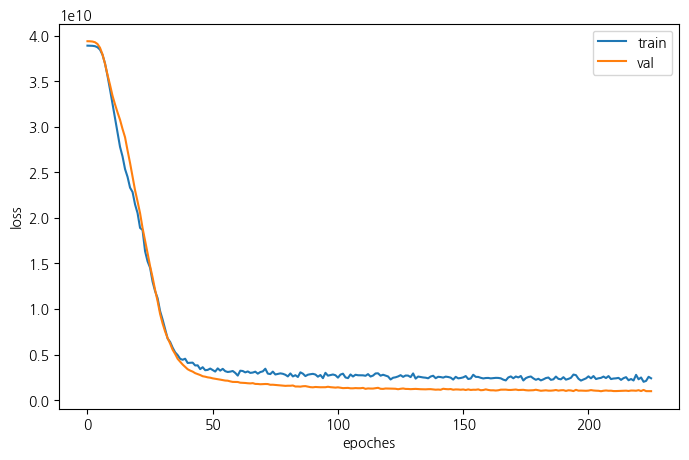

In [60]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_path = "./model/iowa_model_best.keras"
chech_point = ModelCheckpoint(filepath=model_path, monitor='val_loss', save_best_only=True)
history = model.fit(X_train_df, y_train, epochs=1000, batch_size=32, validation_data=(X_test_df, y_test),
                    callbacks=[early_stop, chech_point])
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epoches")
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 모델 불러와서 예측

In [61]:
from keras.models import load_model

In [67]:
best_model = load_model("./model/iowa_model_best.keras")
pred = best_model.predict(X_test_df)
pred = pd.DataFrame(pred, columns=['pred'])
pred

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


,pred
0,145976.843750
1,302076.781250
2,91482.656250
3,153704.015625
4,301725.093750
...,...
433,124919.742188
434,123380.648438
435,200898.562500
436,127828.414062


In [68]:
from sklearn.metrics import mean_squared_error

In [69]:
print('mse: ', mean_squared_error(y_test, pred))
print('rmse: ', np.sqrt(mean_squared_error(y_test, pred)))

mse:  976878337.5613575
rmse:  31255.052992457997


In [70]:
real_price = y_test.reset_index(drop=True)
real_price

0      154500
1      325000
2      115000
3      159000
4      315500
        ...  
433    139000
434    126175
435    205950
436    110000
437    485000
Name: SalePrice, Length: 438, dtype: int64

In [66]:
pred.index 

RangeIndex(start=0, stop=438, step=1)

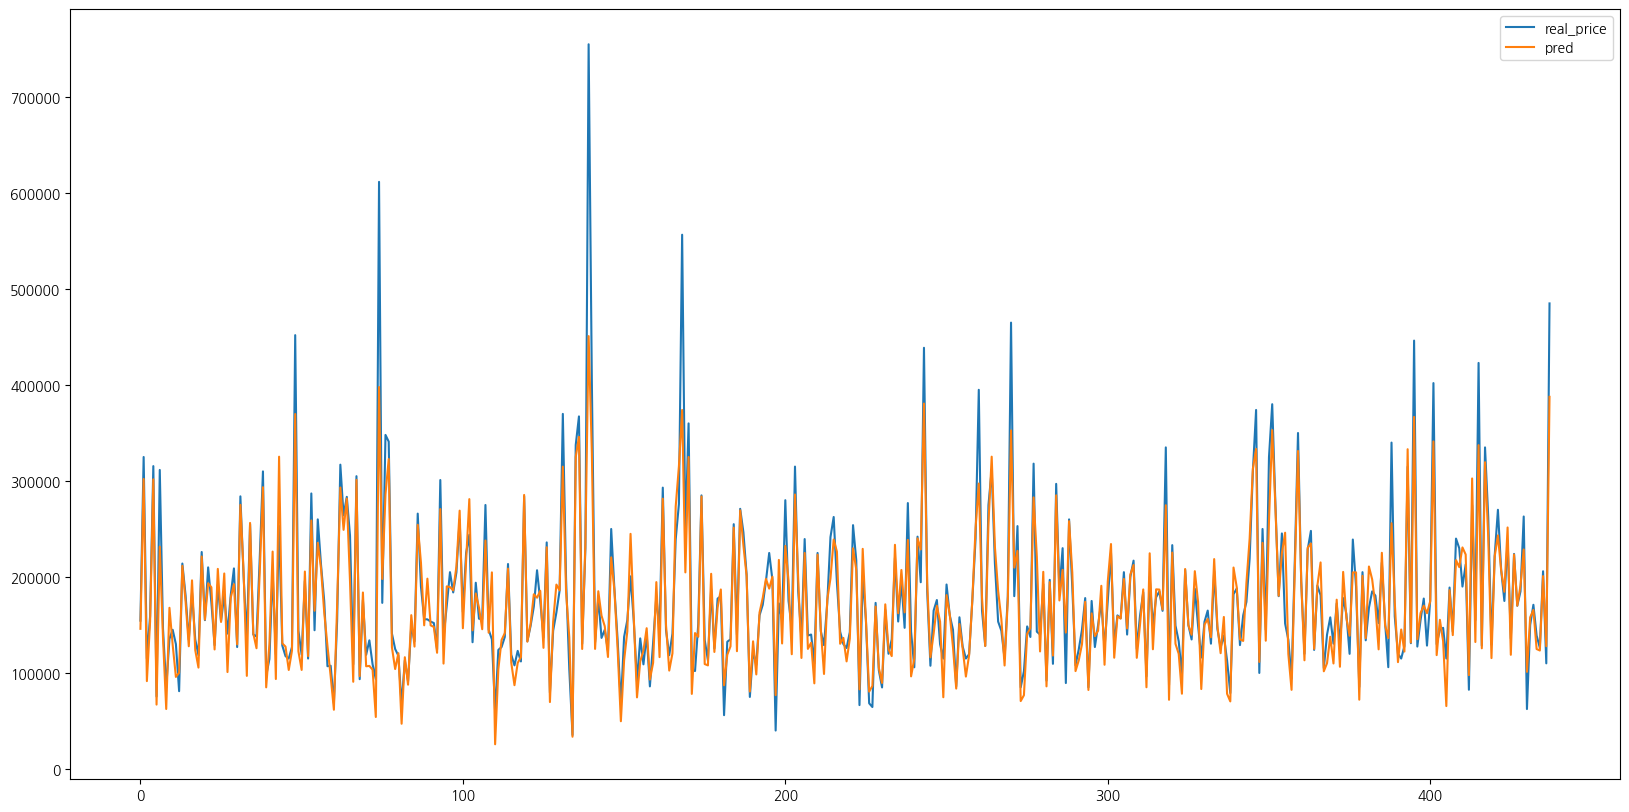

In [72]:
plt.figure(figsize=(20, 10))
plt.plot(real_price, label="real_price")
plt.plot(pred, label="pred")
plt.legend()
plt.show()